In [1]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, rand_score
from skfuzzy.cluster import cmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import NMF
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
df = pd.read_csv('/Users/ayushshastry/Desktop/Project-1/osmanya_mnist_sample.csv')

In [4]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,digit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [5]:
df.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,digit
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206000,0.178000,0.0,0.0,0.003000,0.0,0.0,0.0,0.0,4.491000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.795682,4.008539,0.0,0.0,0.094868,0.0,0.0,0.0,0.0,2.852728
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,133.000000,100.000000,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, pixel_0 to digit
dtypes: int64(785)
memory usage: 6.0 MB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df_numericals = df.drop(['digit'], axis=1)
df_numericals.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df['digit'].value_counts()

8    112
3    110
4    109
1    107
5    106
0     96
9     94
6     91
7     90
2     85
Name: digit, dtype: int64

In [10]:
df_numericals = df_numericals / 255
df_numericals.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_numericals.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000035,0.000808,0.000698,0.0,0.0,0.000012,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001116,0.018807,0.015720,0.0,0.0,0.000372,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035294,0.521569,0.392157,0.0,0.0,0.011765,0.0,0.0,0.0,0.0


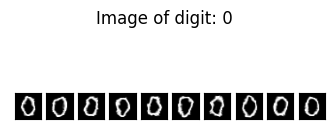

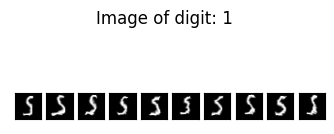

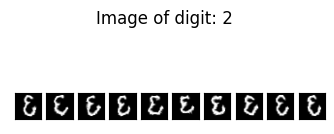

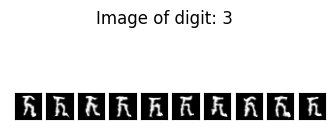

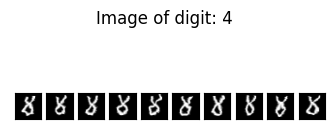

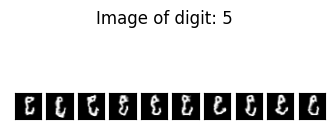

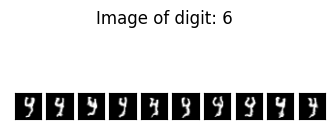

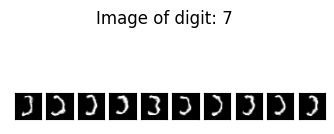

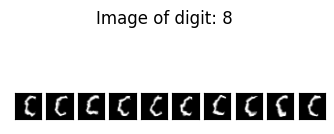

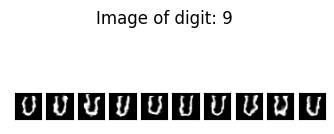

In [12]:
for digit in range(10):
    subset = df_numericals[df['digit'] == digit]

    fig, ax = plt.subplots(1, 10, figsize = (4,2))
    plt.suptitle('Image of digit: '+ str(digit))

    for i in range(min(10, len(subset))):
        object_image = np.array(subset.iloc[i]).reshape((28,28))*255

        ax[i].imshow(object_image, cmap = 'gray')
        ax[i].grid(False)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

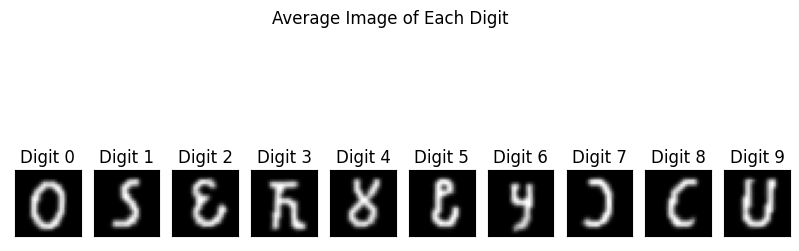

In [13]:
df_num = df_numericals
averages = df_num.groupby(df['digit']).mean()

fig, ax = plt.subplots(1, 10, figsize=(10, 4))
plt.suptitle('Average Image of Each Digit')
for i in range(10):
    object_image = np.array(averages.iloc[i]).reshape((28, 28))
    ax[i].imshow(object_image, cmap='gray')
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('Digit %s' % str(i))
plt.show()

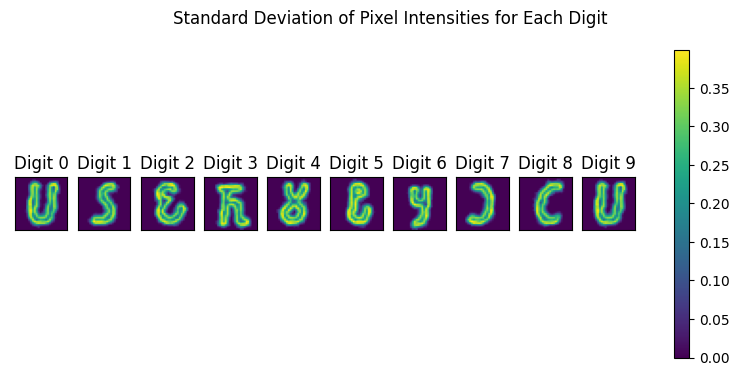

digit
0    0.097300
1    0.071173
2    0.087023
3    0.096172
4    0.092858
5    0.084065
6    0.072712
7    0.068116
8    0.070682
9    0.097354
dtype: float64


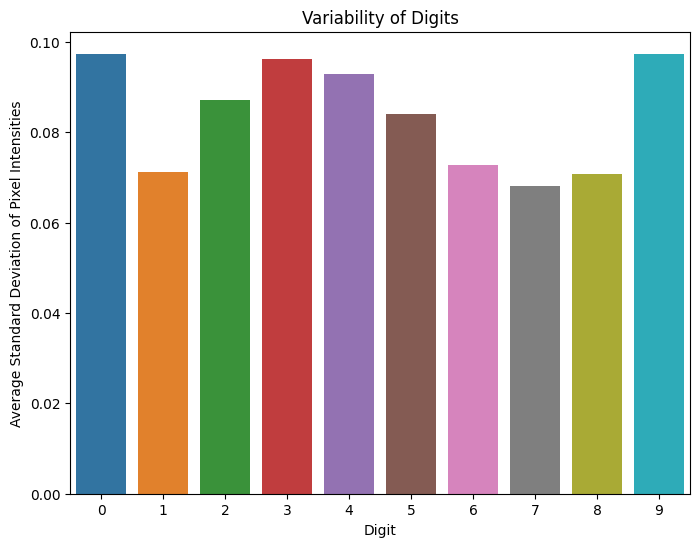

In [14]:
std_devs = df_num.groupby(df['digit']).std()

fig, ax = plt.subplots(1, 10, figsize=(10, 4))
plt.suptitle('Standard Deviation of Pixel Intensities for Each Digit')
for i in range(10):
    object_image = np.array(std_devs.iloc[i]).reshape((28, 28))
    ax[i].imshow(object_image, cmap='viridis') 
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('Digit %s' % str(i))
plt.colorbar(ax[0].imshow(object_image, cmap='viridis'), ax=ax) 
plt.show()

overall_std_dev = df_num.groupby(df['digit']).std().mean(axis=1)
print(overall_std_dev)

plt.figure(figsize=(8,6))
sns.barplot(x=overall_std_dev.index, y=overall_std_dev.values)
plt.xlabel('Digit')
plt.ylabel('Average Standard Deviation of Pixel Intensities')
plt.title('Variability of Digits')
plt.show()

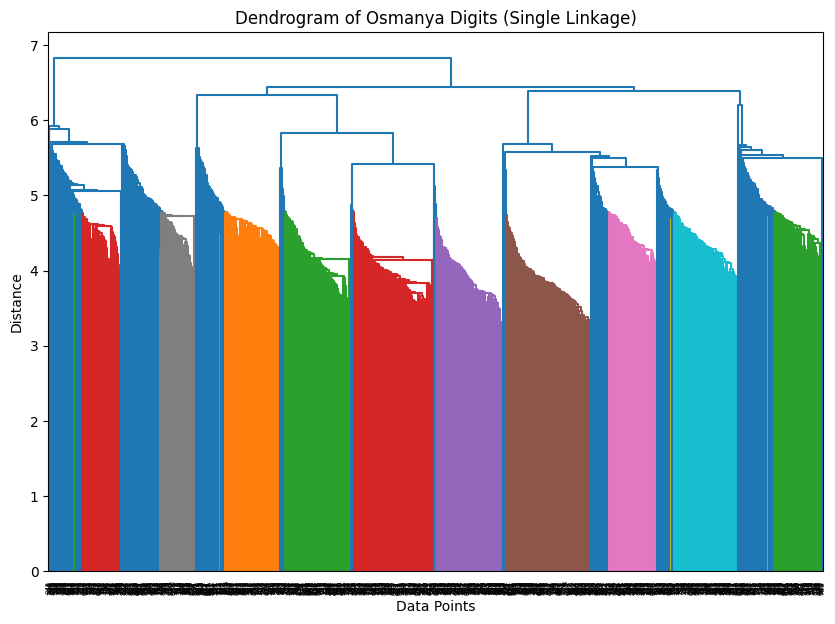

In [15]:
Z = linkage(df_numericals, method='single')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram of Osmanya Digits (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

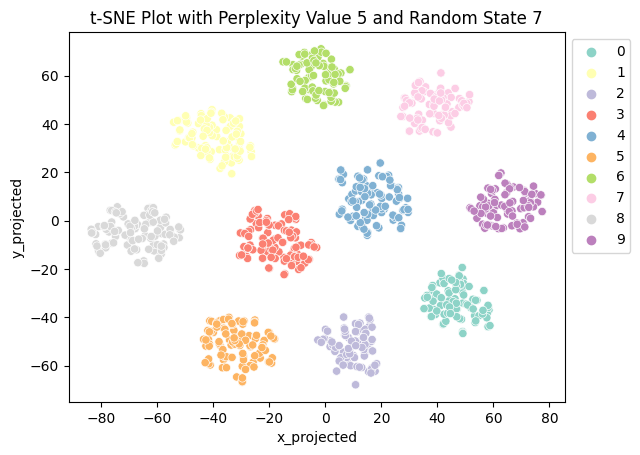

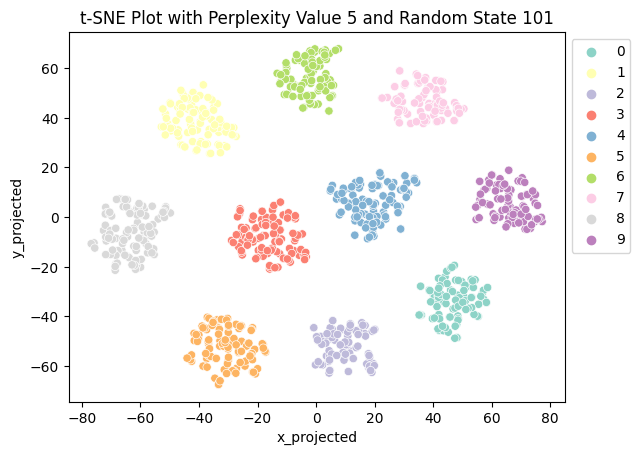

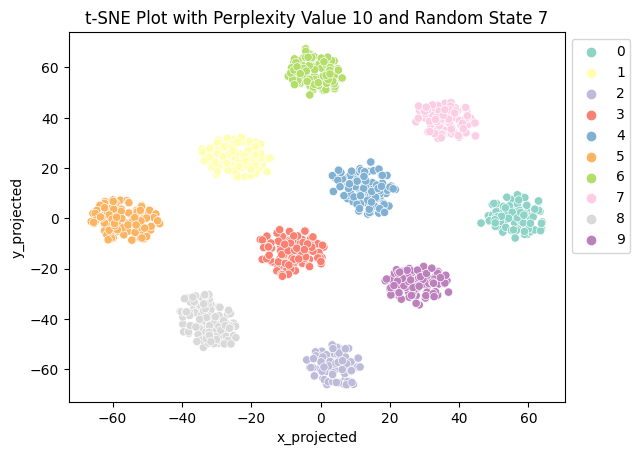

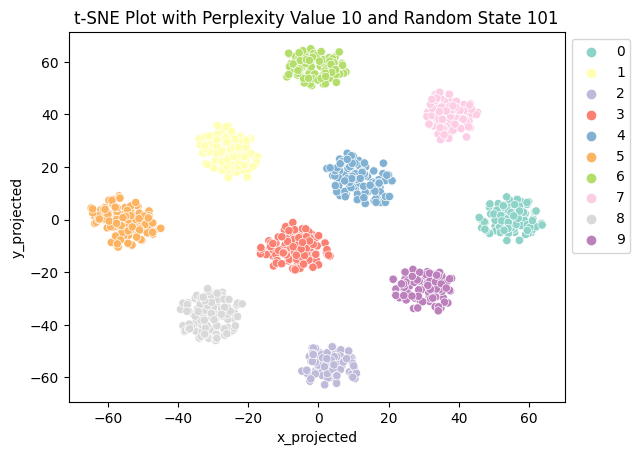

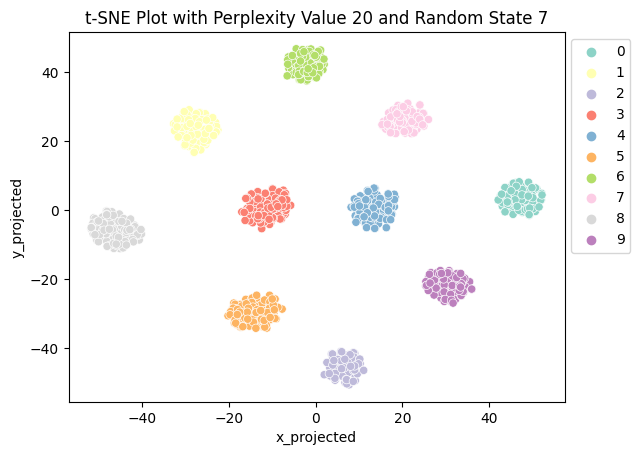

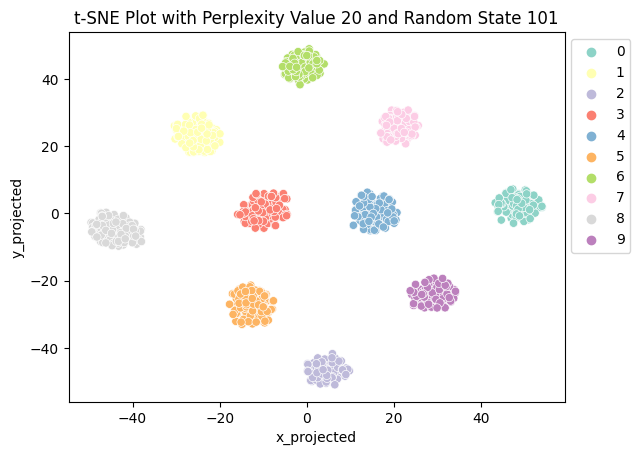

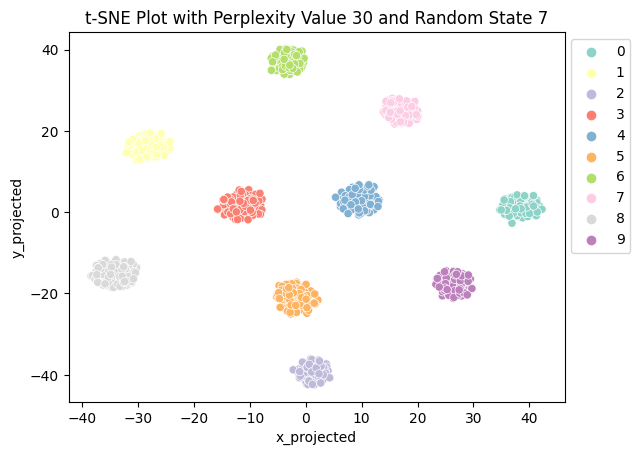

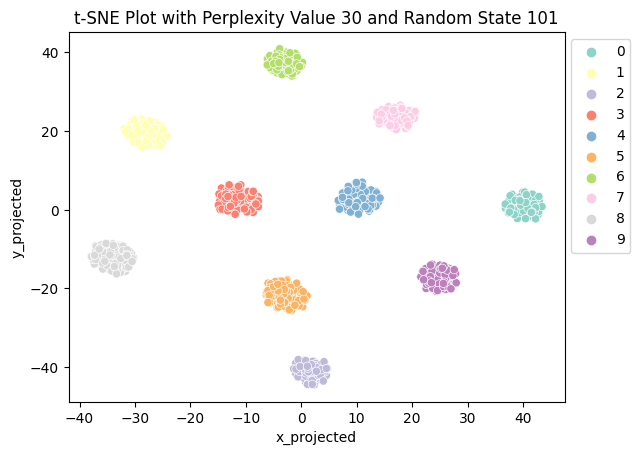

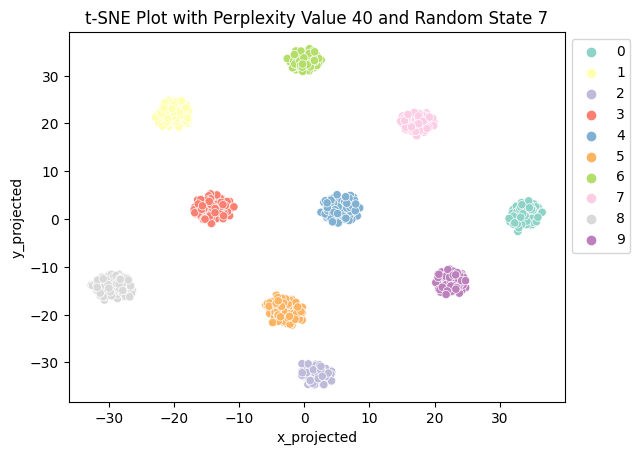

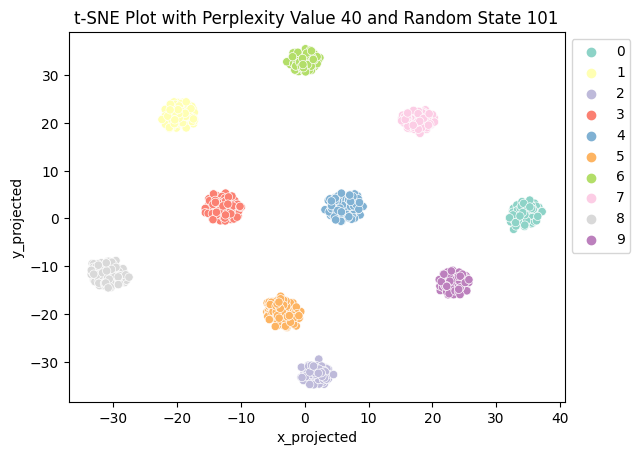

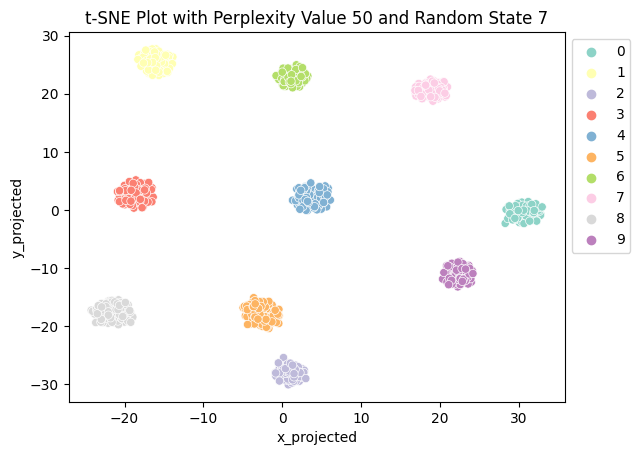

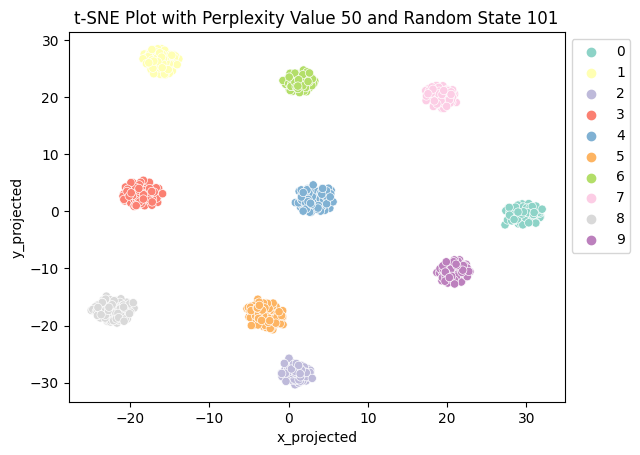

In [16]:
for perp in [5, 10, 20, 30, 40, 50]:
    for rs in [7, 101]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_numericals)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1) 
        sns.scatterplot(x='x_projected', y='y_projected', hue='digit', palette=sns.color_palette("Set3", 10), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' % (perp, rs))
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()

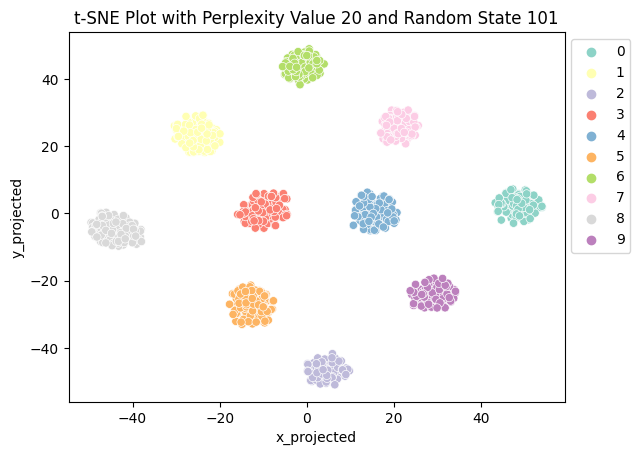

In [17]:
tsne = TSNE(n_components=2, perplexity=20, random_state=101)
data_tsne = tsne.fit_transform(df_numericals)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected', y='y_projected', hue='digit', palette=sns.color_palette("Set3", 10), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' % (20, 101))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

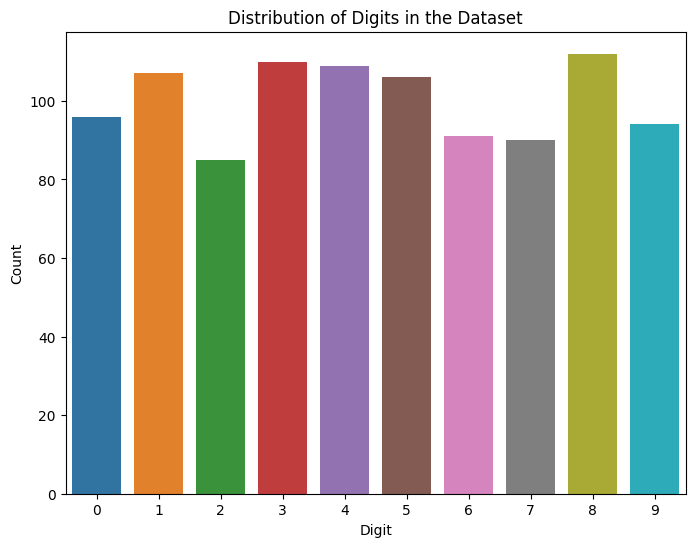

In [18]:
digit_counts = df['digit'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=digit_counts.index, y=digit_counts.values)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in the Dataset')
plt.show()

In [19]:
avg_inertia_list=[]
for k in range(1,19):
    print('-----------')
    print('Clusterings with k= '+str(k)+' Clusters')
    sub_inertia_list=[]
    for i in range(0,4):
        kmeans=KMeans(n_clusters=k, n_init = 10).fit(df_numericals)
        sub_inertia_list.append(kmeans.inertia_)
        print('Inertia: '+str(kmeans.inertia_))
    avg_inertia_list.append(np.average(sub_inertia_list))
    print('Average Inertia: '+str(np.average(sub_inertia_list)))

-----------
Clusterings with k= 1 Clusters
Inertia: 41642.57273102651
Inertia: 41642.57273102651
Inertia: 41642.57273102651
Inertia: 41642.57273102651
Average Inertia: 41642.57273102651
-----------
Clusterings with k= 2 Clusters
Inertia: 35921.107019902134
Inertia: 35921.107019902134
Inertia: 35921.107019902134
Inertia: 35921.107019902134
Average Inertia: 35921.107019902134
-----------
Clusterings with k= 3 Clusters
Inertia: 30869.880865258237
Inertia: 30869.880865258237
Inertia: 30869.880865258237
Inertia: 30869.880865258237
Average Inertia: 30869.880865258237
-----------
Clusterings with k= 4 Clusters
Inertia: 27964.47515359179
Inertia: 27964.47515359179
Inertia: 27964.47515359179
Inertia: 27964.47515359179
Average Inertia: 27964.47515359179
-----------
Clusterings with k= 5 Clusters
Inertia: 25634.18149148218
Inertia: 25634.18149148218
Inertia: 25627.64736343214
Inertia: 25627.647363432137
Average Inertia: 25630.91442745716
-----------
Clusterings with k= 6 Clusters
Inertia: 23825.8

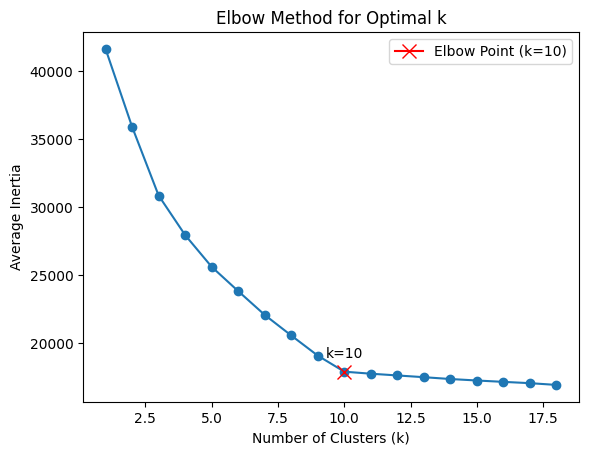

In [20]:
k_values = range(1, 19)
inertia_values = avg_inertia_list


plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Inertia')
plt.title('Elbow Method for Optimal k')

elbow_point = 10
plt.plot(elbow_point, inertia_values[elbow_point - 1], marker='x', markersize=10, color='red', label='Elbow Point (k=10)')
plt.annotate(f'k={elbow_point}', (elbow_point, inertia_values[elbow_point - 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()
plt.show()

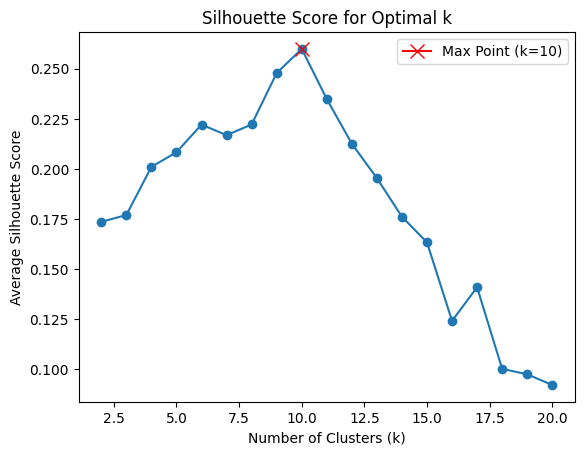

In [21]:
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    scores_k = []
    for _ in range(3):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(df_num)
        labels = kmeans.labels_
        scores_k.append(silhouette_score(df_num, labels))
    silhouette_scores.append(np.mean(scores_k))

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal k')

max_point = 10
plt.plot(max_point, silhouette_scores[max_point-2], marker='x', markersize=10, color='red', label='Max Point (k=10)')
plt.annotate(f'k={max_point}', (max_point, inertia_values[max_point - 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()
plt.show()
plt.show()

In [23]:
kmeans = KMeans(n_clusters=10, n_init=10).fit(df_numericals)

In [24]:
df_numericals['cluster'] = kmeans.labels_

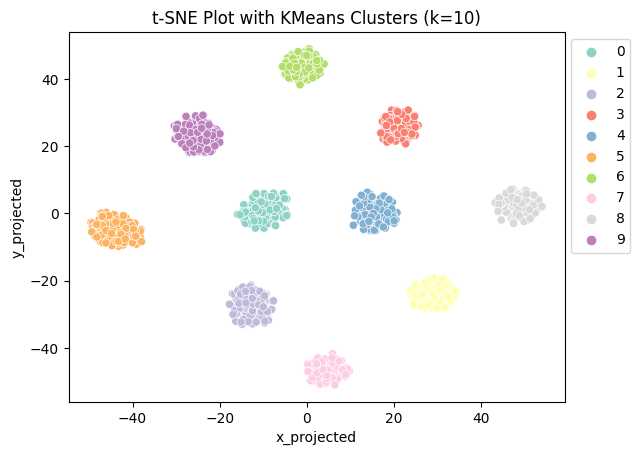

In [25]:
df_combo['kmeans_cluster'] = kmeans.labels_

sns.scatterplot(x='x_projected', y='y_projected', hue='kmeans_cluster', palette=sns.color_palette("Set3", 10), data=df_combo)
plt.title('t-SNE Plot with KMeans Clusters (k=10)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [26]:
preassigned_labels = df_combo['digit']
predicted_labels = df_combo['kmeans_cluster']

rand_index = rand_score(preassigned_labels, predicted_labels)
print(f"Rand Index: {rand_index}")

adjusted_rand_index = adjusted_rand_score(preassigned_labels, predicted_labels)
print(f"Adjusted Rand Index: {adjusted_rand_index}")

Rand Index: 1.0
Adjusted Rand Index: 1.0


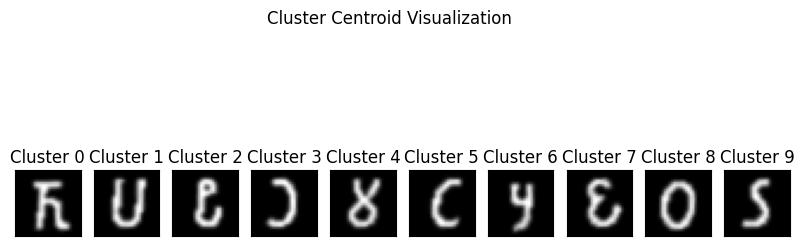

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
fig, ax = plt.subplots(1, 10, figsize=(10, 4))
plt.suptitle('Cluster Centroid Visualization')
for i in range(10):
    object_image = np.array(centroids.iloc[i]).reshape((28, 28))
    ax[i].imshow(object_image, cmap='gray')
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('Cluster %s' % str(i))
plt.show()

Average Silhouette Score: 0.32341235722972117


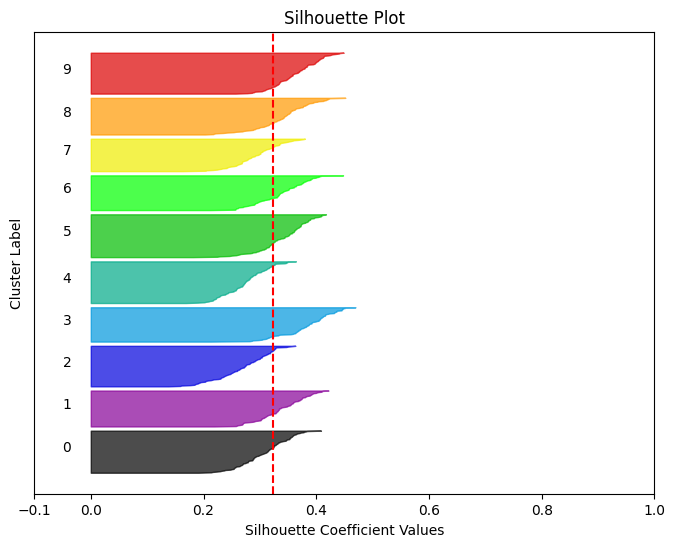

In [28]:
from sklearn.metrics import silhouette_samples
silhouette_avg = silhouette_score(df_numericals, kmeans.labels_)
print(f"Average Silhouette Score: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(df_numericals, kmeans.labels_)

y_lower = 10

fig, ax = plt.subplots(figsize=(8,6))

for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i)/10)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg, color='red', linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

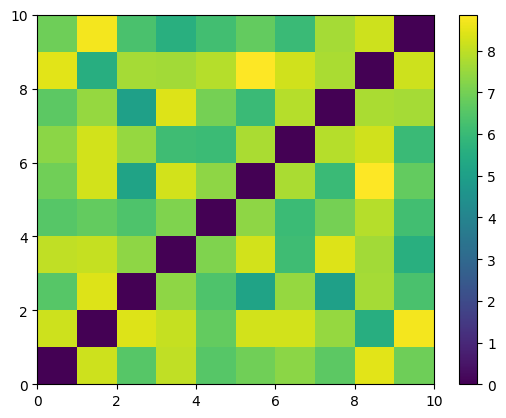

In [29]:
from scipy.spatial.distance import pdist, squareform

dist_mat = squareform(pdist(centroids))

plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(centroids)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [30]:
df_numericals_nmf = df_numericals.copy()
df_numericals_nmf.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [31]:
df_numericals_nmf = df_numericals_nmf.drop(['cluster'], axis=1)
df_numericals_nmf.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


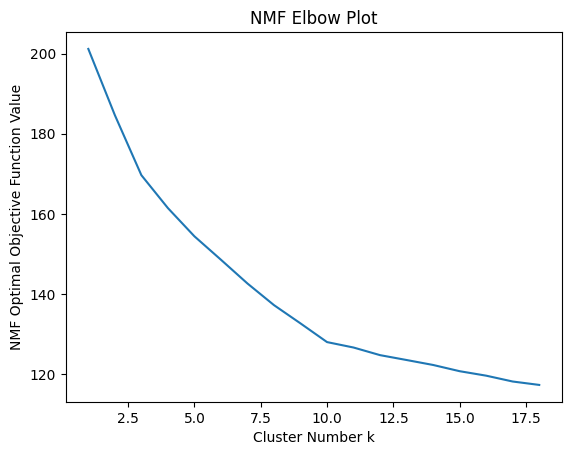

In [32]:
from sklearn.decomposition import NMF
opt_values=[]

for k in range(1, 19):
    nmf = NMF(n_components=k, random_state=437)
    nmf.fit(df_numericals_nmf)
    opt_values.append(nmf.reconstruction_err_)

plt.plot(range(1, 19), opt_values)
plt.title('NMF Elbow Plot')
plt.xlabel('Cluster Number k')
plt.ylabel('NMF Optimal Objective Function Value')
plt.show()

In [33]:
nmf = NMF(n_components=10, random_state=437)
W = nmf.fit_transform(df_numericals_nmf)
H = nmf.components_

In [34]:
W.shape, H.shape

((1000, 10), (10, 784))

In [35]:
df_W = pd.DataFrame(W, columns=['image_cluster_'+str(k) for k in range(0,10)])
df_W.round(4)

,image_cluster_0,image_cluster_1,image_cluster_2,image_cluster_3,image_cluster_4,image_cluster_5,image_cluster_6,image_cluster_7,image_cluster_8,image_cluster_9
0,0.0097,0.4852,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4109
1,0.0258,0.0115,0.3063,0.0000,0.0296,0.0000,0.0000,0.0000,0.0000,0.0462
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040,0.0000,0.1780,0.0000,1.3925
3,0.0000,0.0000,0.0000,0.0000,0.0088,0.0000,0.0000,0.0000,0.0000,1.6147
4,0.0000,0.0000,0.0000,0.0586,0.0474,0.0000,0.6942,0.0000,0.0899,0.0000
...,...,...,...,...,...,...,...,...,...,...
995,0.0000,0.0000,0.0508,0.0000,0.0261,0.0079,0.0000,0.0705,1.1325,0.0000
996,0.0000,0.0000,0.0000,0.4207,0.0000,0.1975,0.0436,0.0000,0.0000,0.0000
997,0.0016,0.0632,0.0266,0.0581,0.0799,0.4994,0.0686,0.0000,0.0000,0.1572
998,0.0000,0.0109,0.0226,0.0000,0.0337,0.0000,0.0000,0.9010,0.1137,0.1500


In [36]:
H_df = pd.DataFrame(H, columns=df_numericals_nmf.columns, index=[f'Cluster_{i+1}' for i in range(H.shape[0])])

In [37]:
H_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
Cluster_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000081,0.000675,0.000342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000384,0.009352,0.008197,0.0,0.0,0.000160,0.0,0.0,0.0,0.0
Cluster_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000012,0.0,0.0,0.0,0.0
Cluster_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000043,0.000435,0.000265,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000022,0.000461,0.000390,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Cluster_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000003,0.0,0.0,0.0,0.0


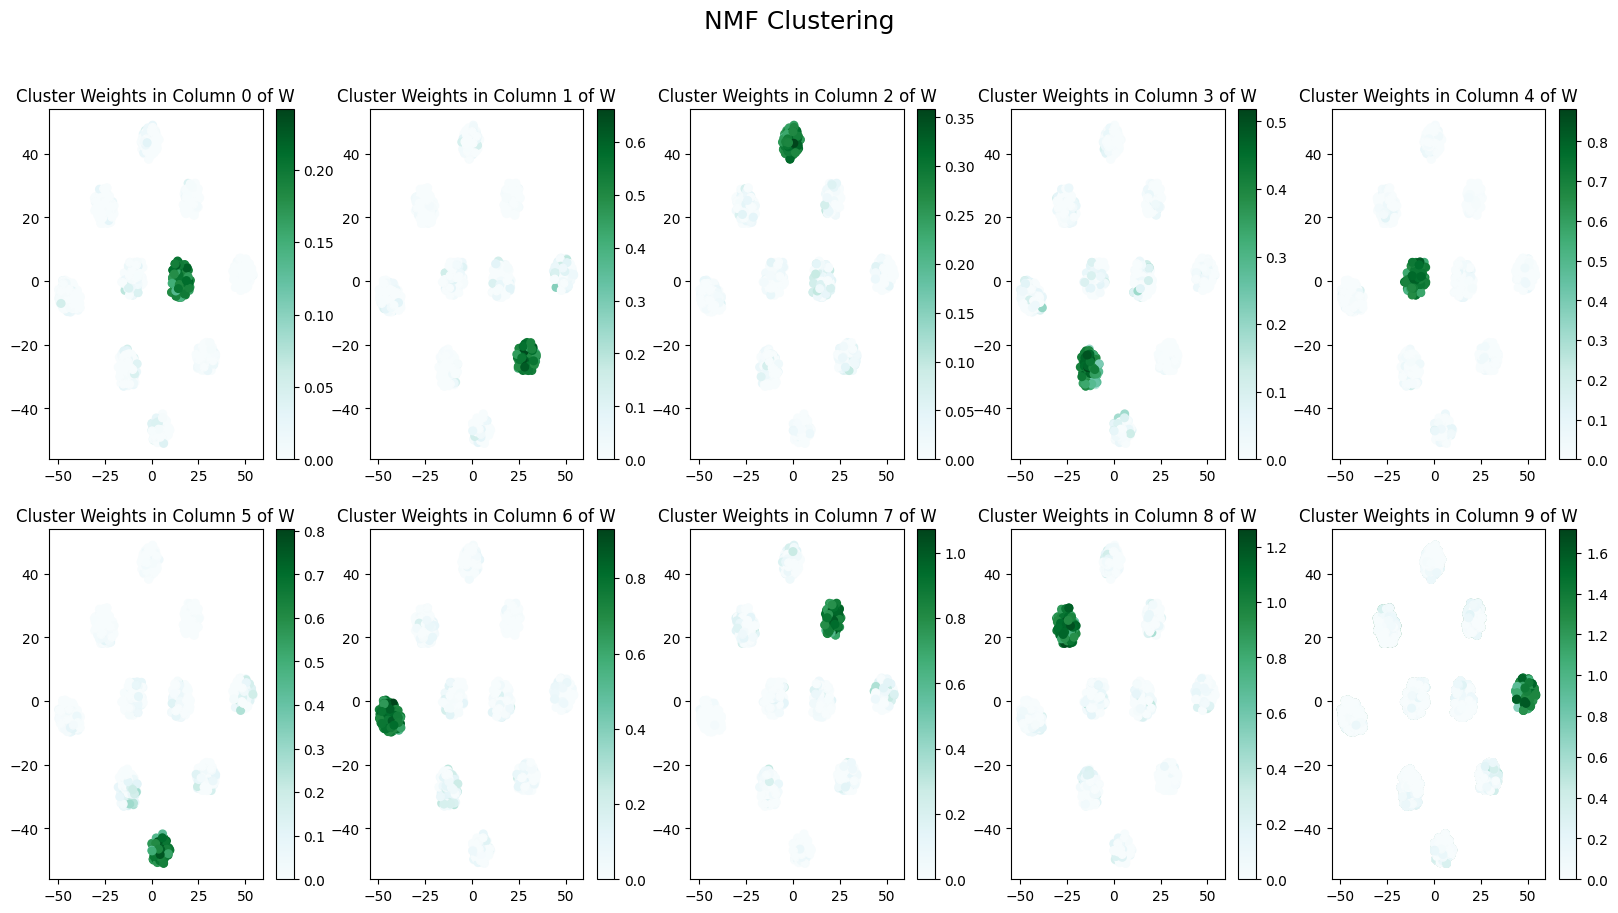

In [38]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
plt.suptitle('NMF Clustering', fontsize=18)
for i in range(0,10):


    df_combo['Cluster %s Membership Score'%str(i)]=df_W.iloc[:,i]

    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn")
    ax[int(np.floor(i/5)),int(i%5)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn")

    fig.colorbar(points, ax=ax[int(np.floor(i/5)),int(i%5)])
    ax[int(np.floor(i/5)),int(i%5)].set_title('Cluster Weights in Column %s of W'%(str(i)))
plt.show()

In [39]:
cm_scores_W = W/np.sum(W, axis=1, keepdims=True)
df_cm_scores_W=pd.DataFrame(cm_scores_W, columns=df_W.columns)

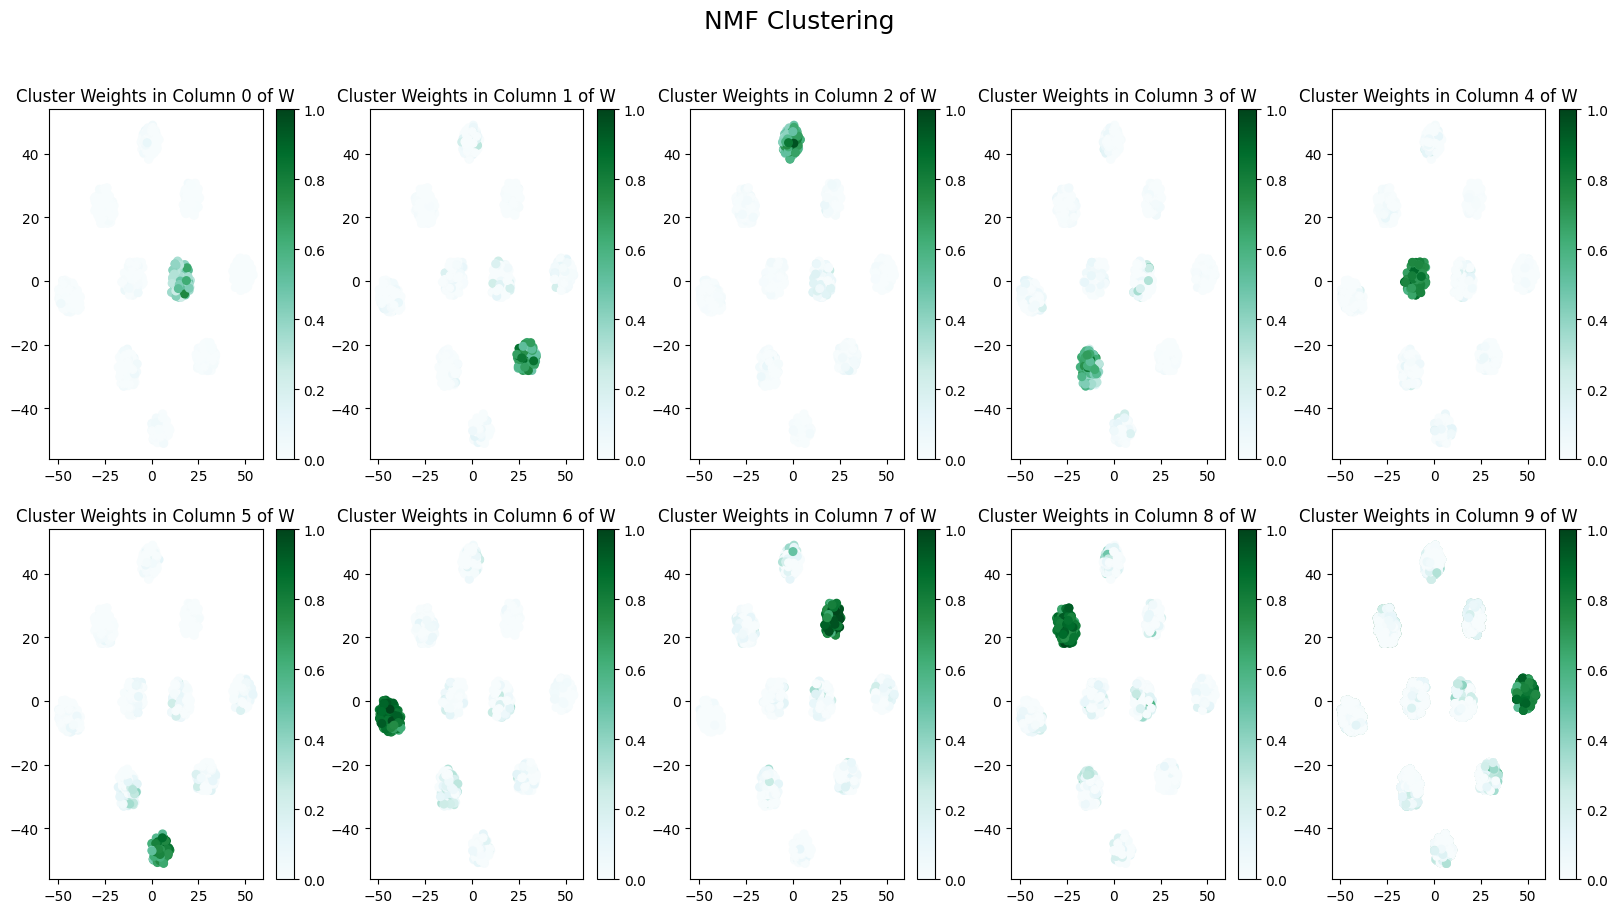

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
plt.suptitle('NMF Clustering', fontsize=18)
for i in range(0,10):

    df_combo['Cluster %s Membership Score'%str(i)]=df_cm_scores_W.iloc[:,i]

    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn", vmin=0, vmax=1)
    ax[int(np.floor(i/5)),int(i%5)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn", vmin=0, vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/5)),int(i%5)])
    ax[int(np.floor(i/5)),int(i%5)].set_title('Cluster Weights in Column %s of W'%(str(i)))
plt.show()

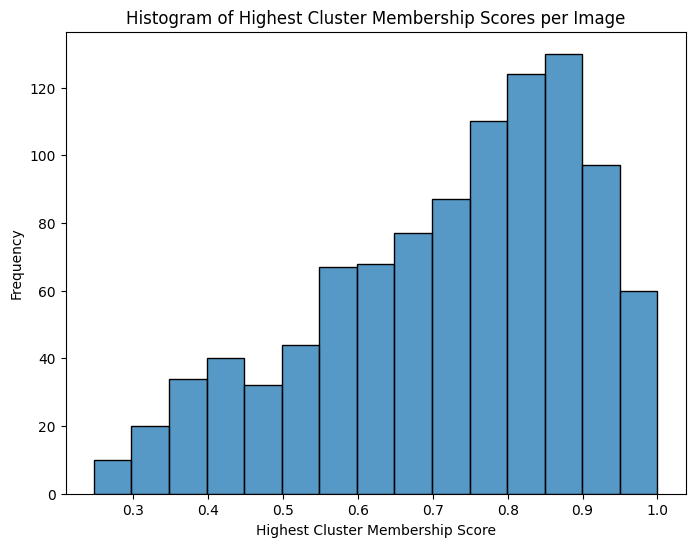

In [41]:
max_array = np.max(df_cm_scores_W, axis=1)
max_array


plt.figure(figsize=(8, 6))
sns.histplot(max_array)
plt.title("Histogram of Highest Cluster Membership Scores per Image")
plt.xlabel("Highest Cluster Membership Score")
plt.ylabel("Frequency")
plt.show()

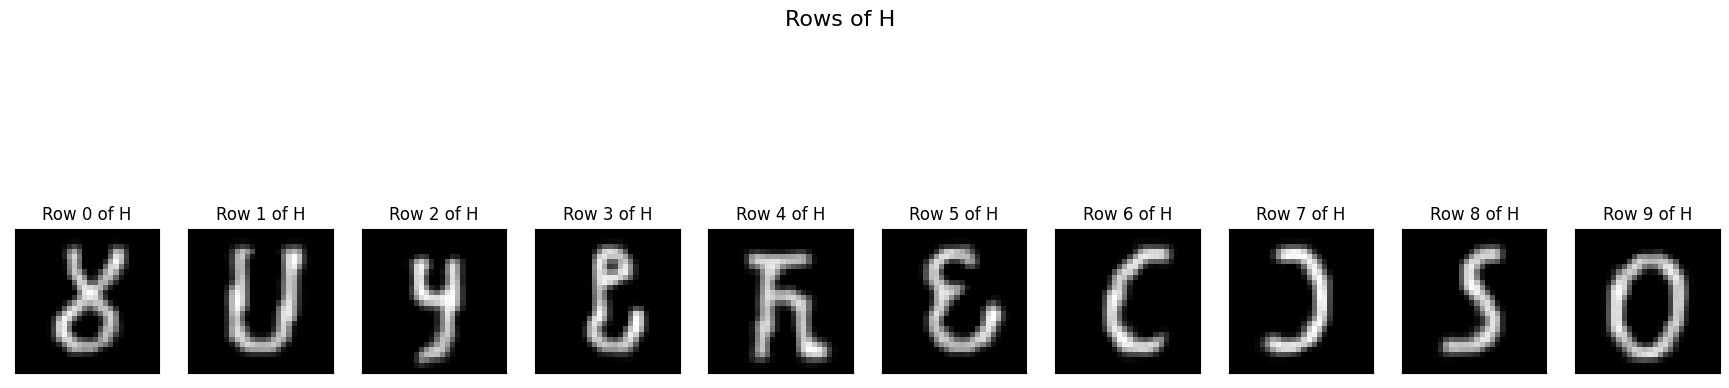

In [42]:
fig, ax = plt.subplots(1, 10, figsize=(22, 6))
fig.suptitle('Rows of H', fontsize=16)
for i in range(10):
    ax[i].imshow(H[i,:].reshape((28, 28)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('Row %s of H'%str(i))

plt.show()

In [43]:
Y = np.dot(W,H)
df_Y = pd.DataFrame(Y, columns=df_numericals_nmf.columns)

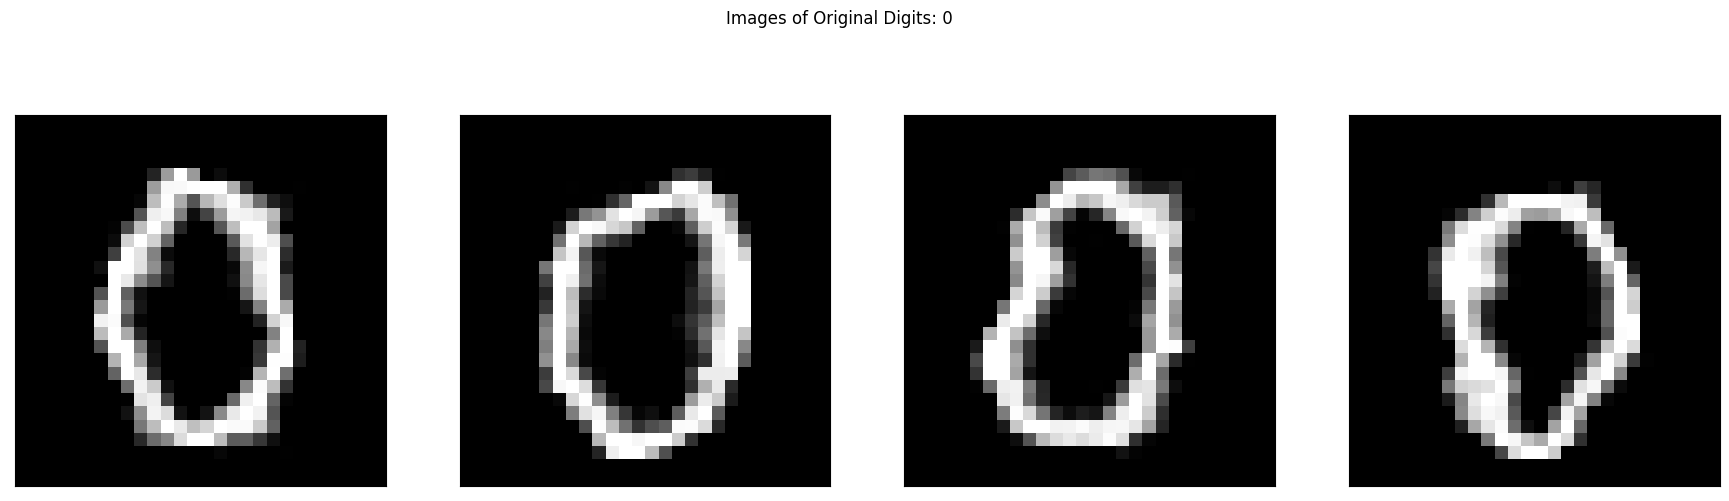

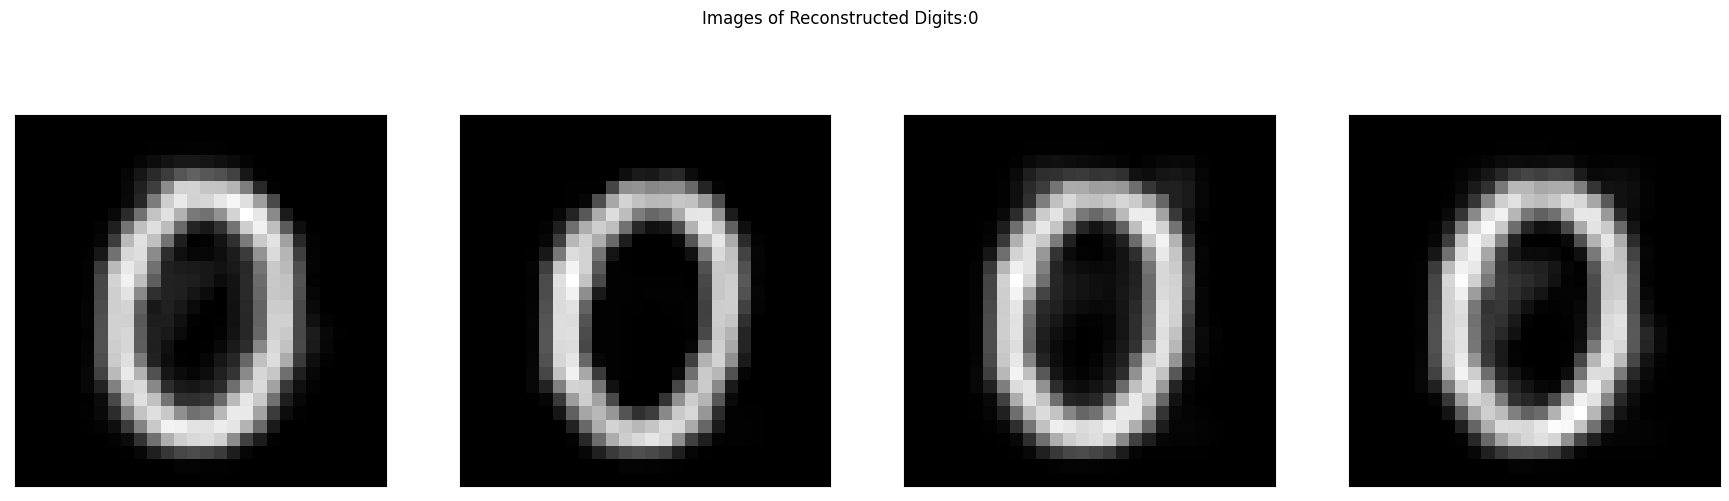

-------------------------------


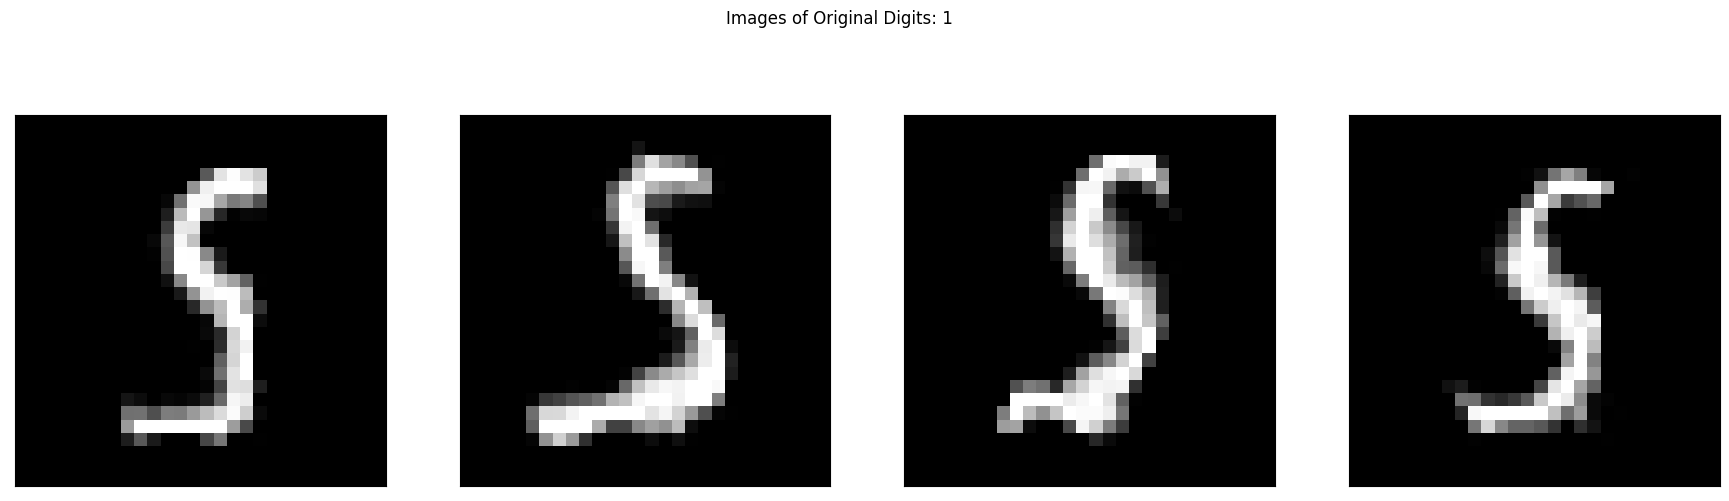

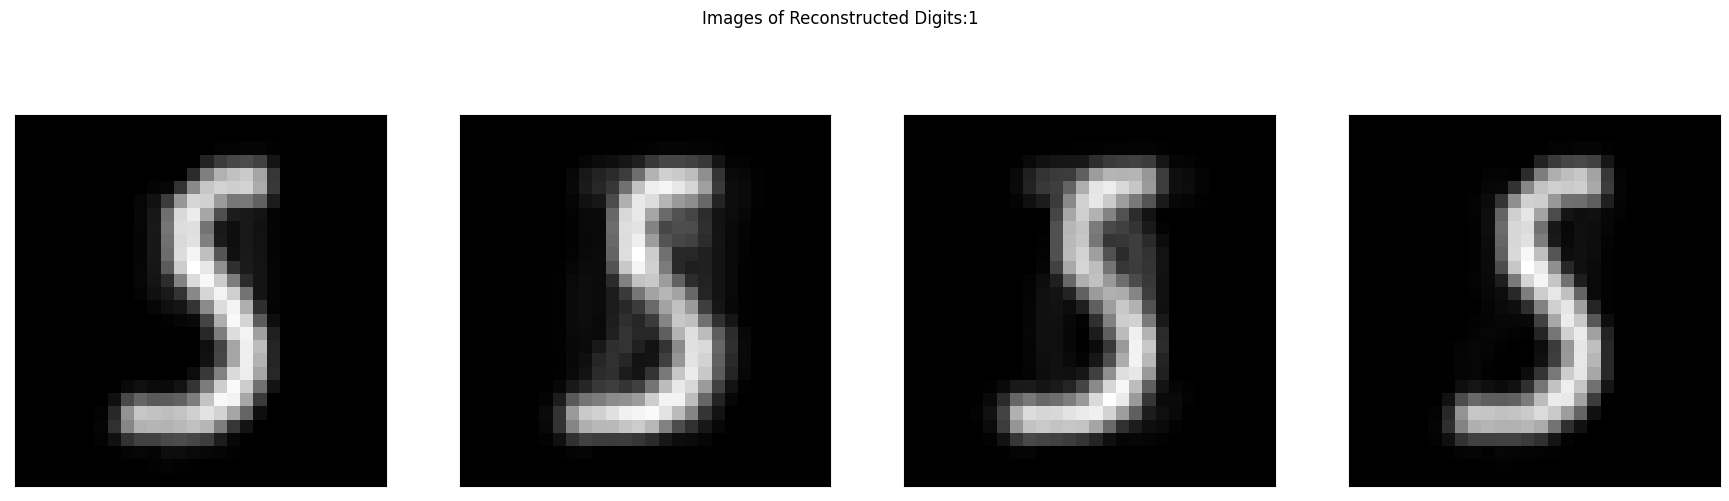

-------------------------------


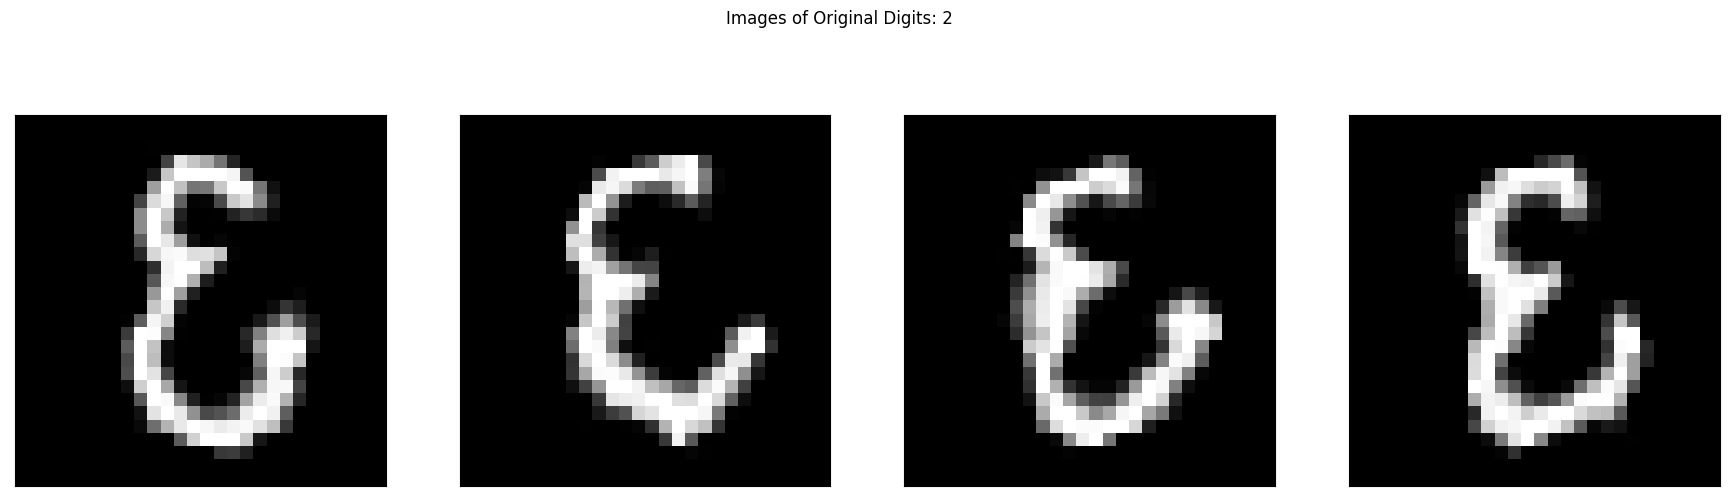

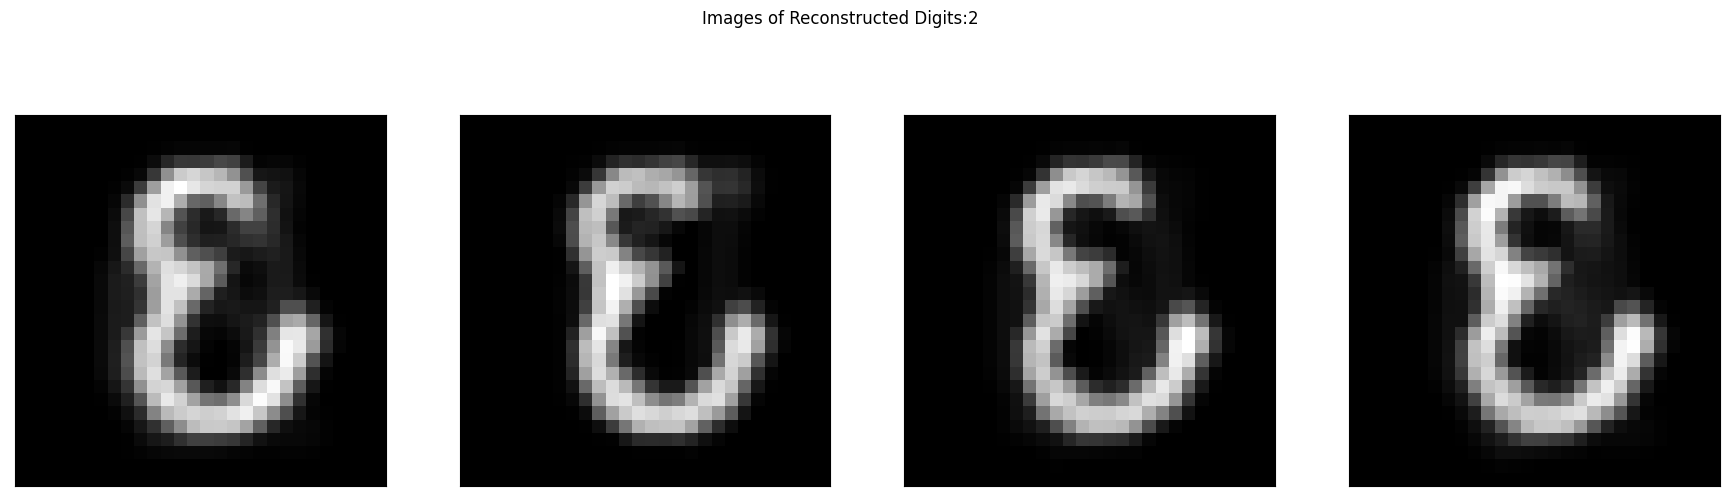

-------------------------------


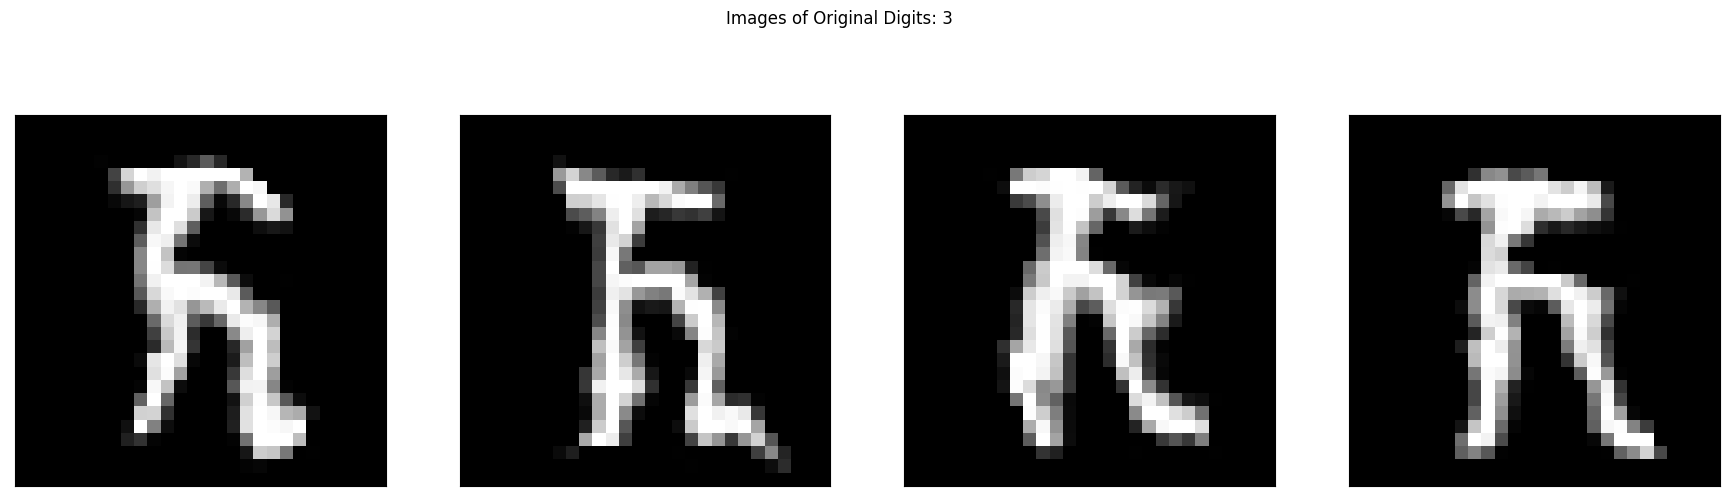

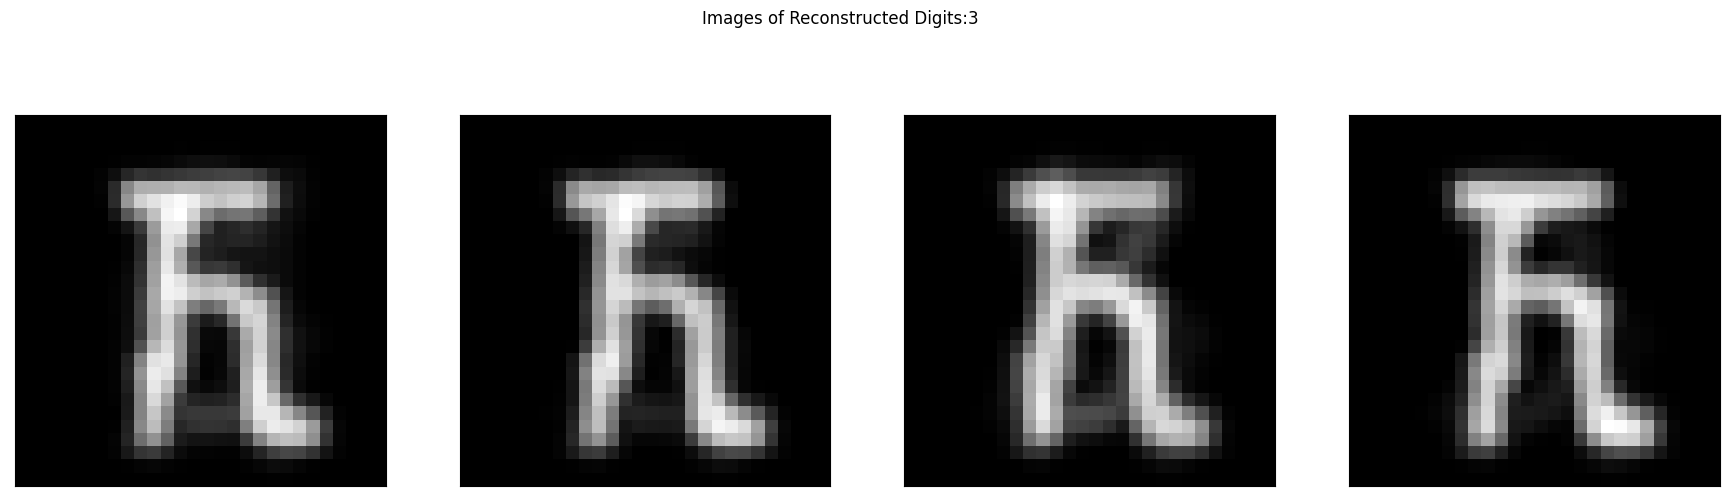

-------------------------------


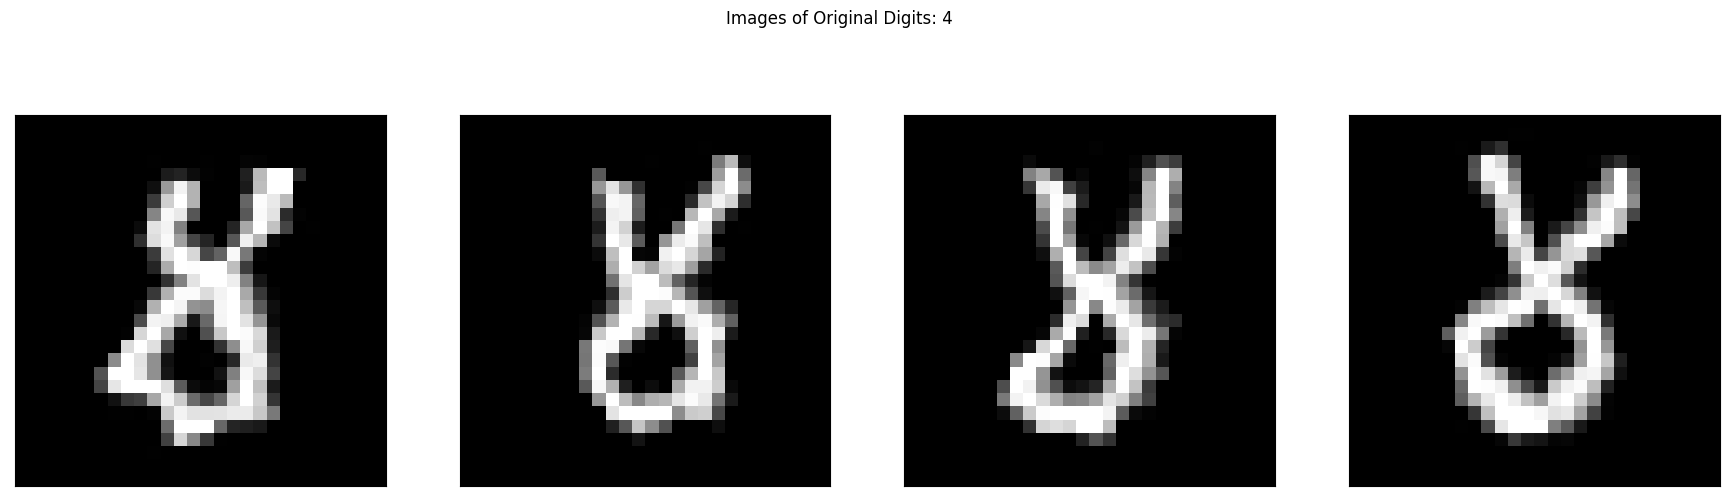

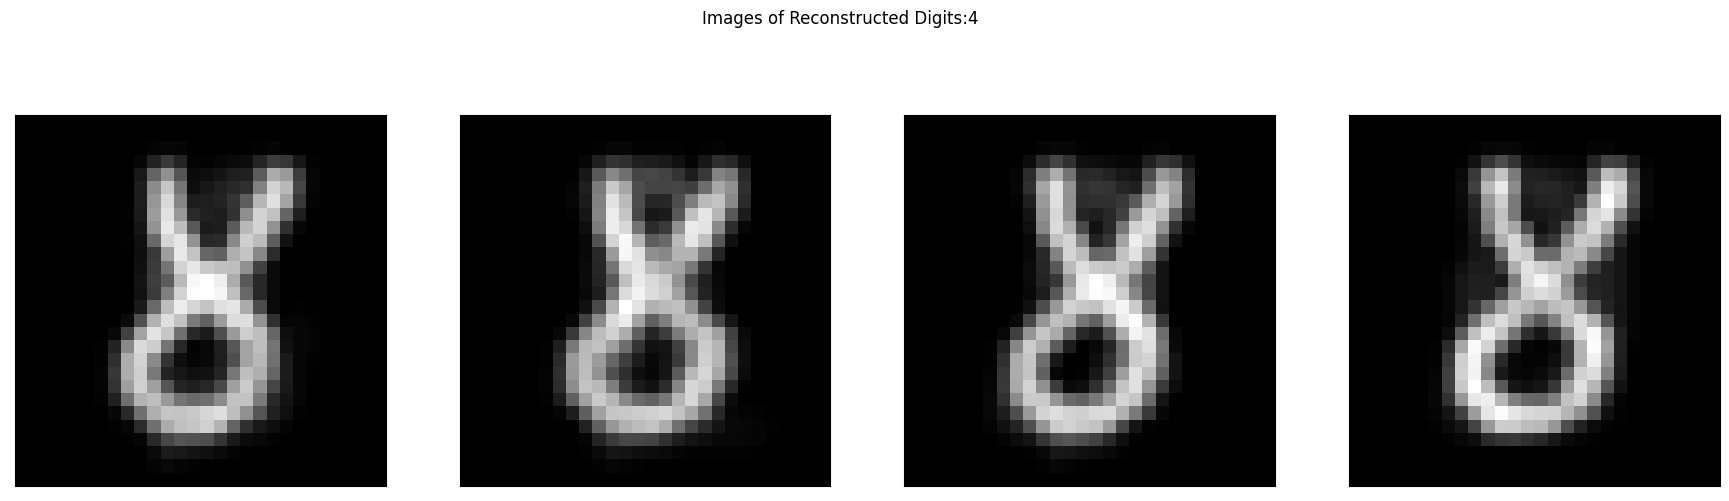

-------------------------------


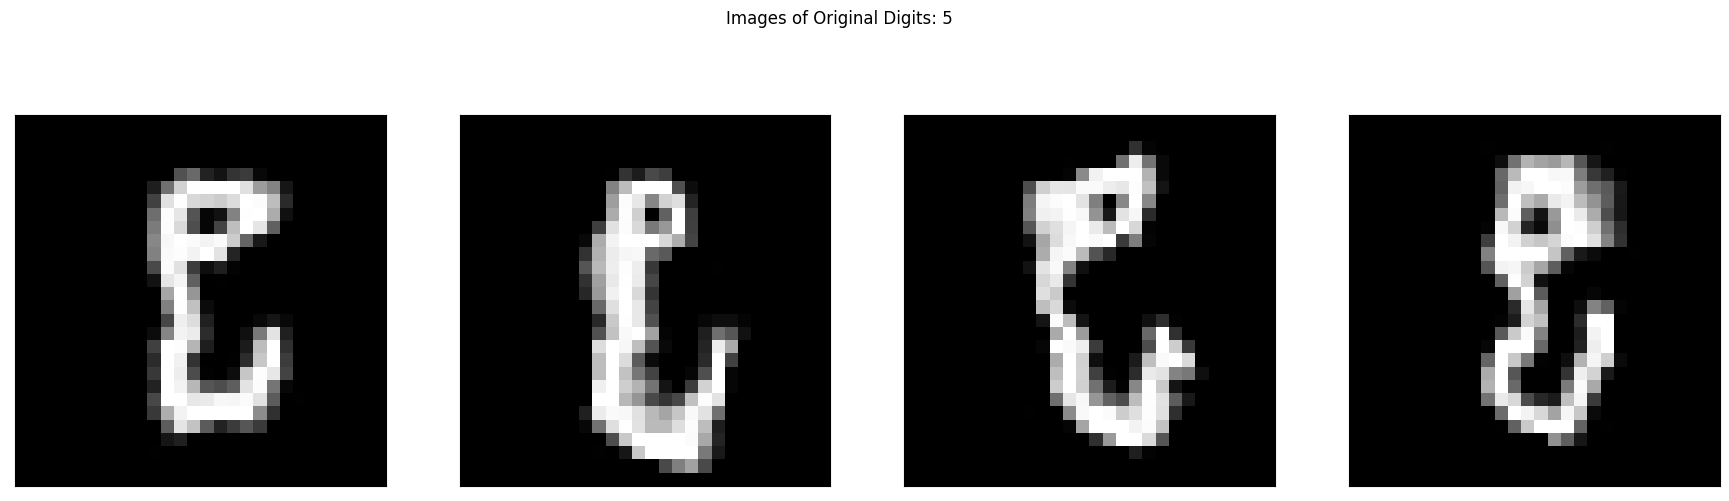

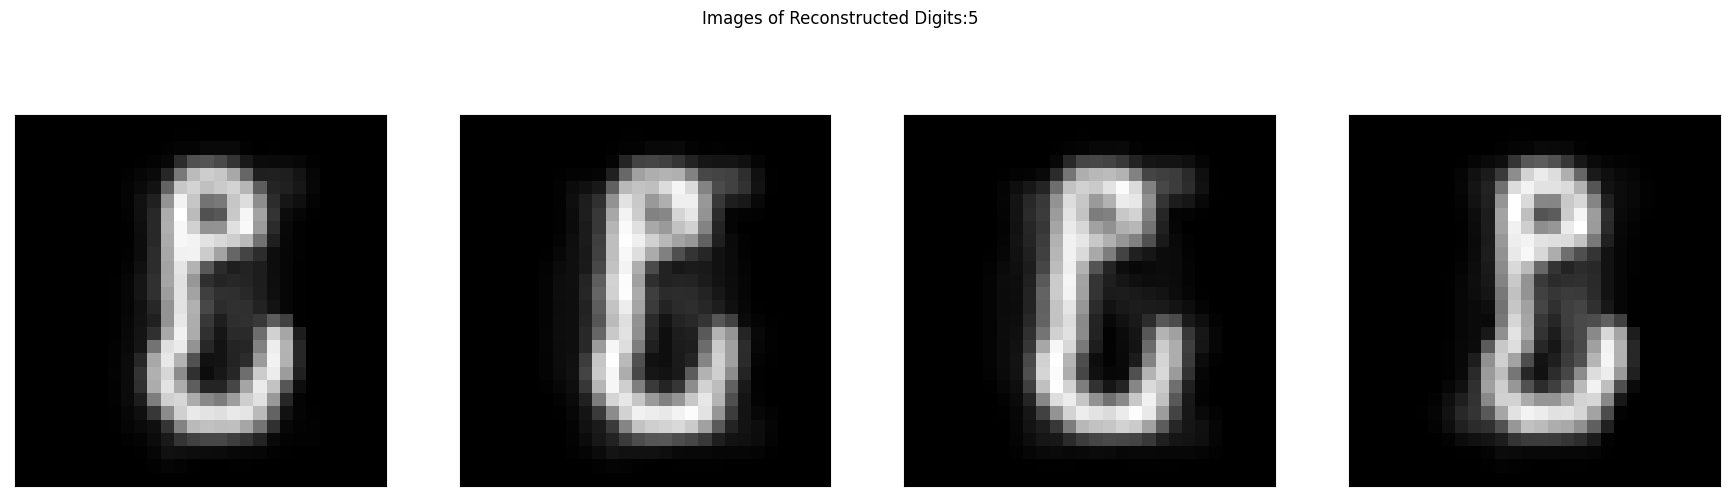

-------------------------------


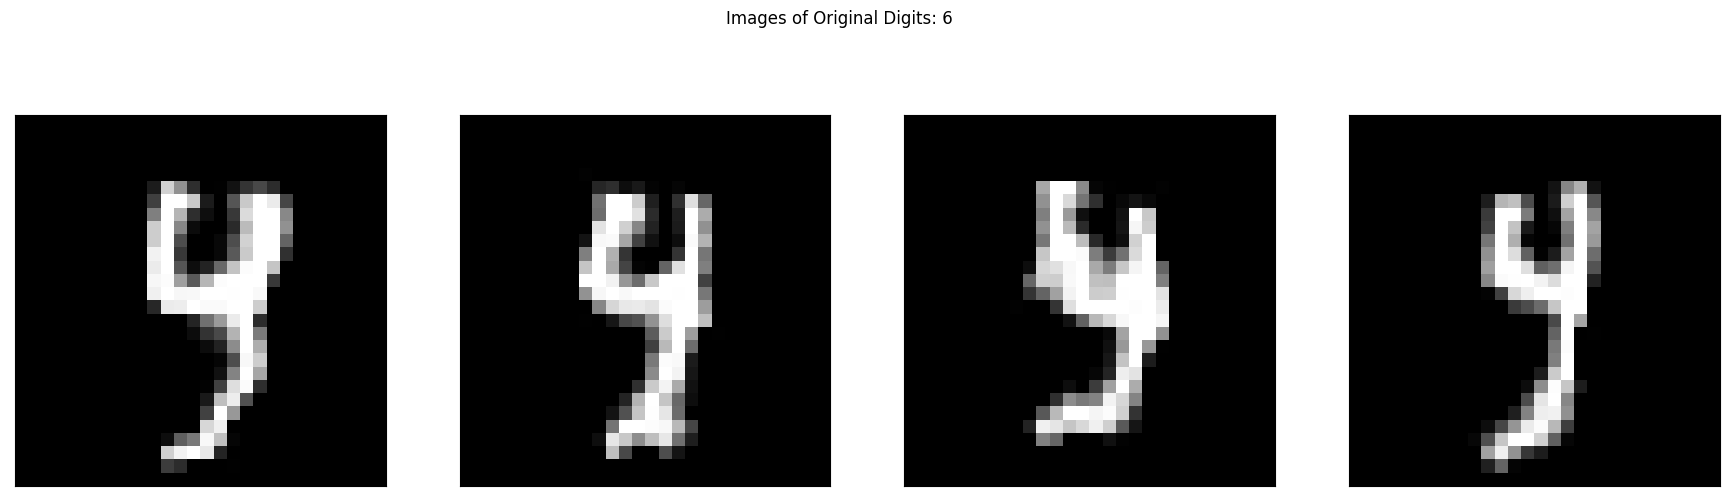

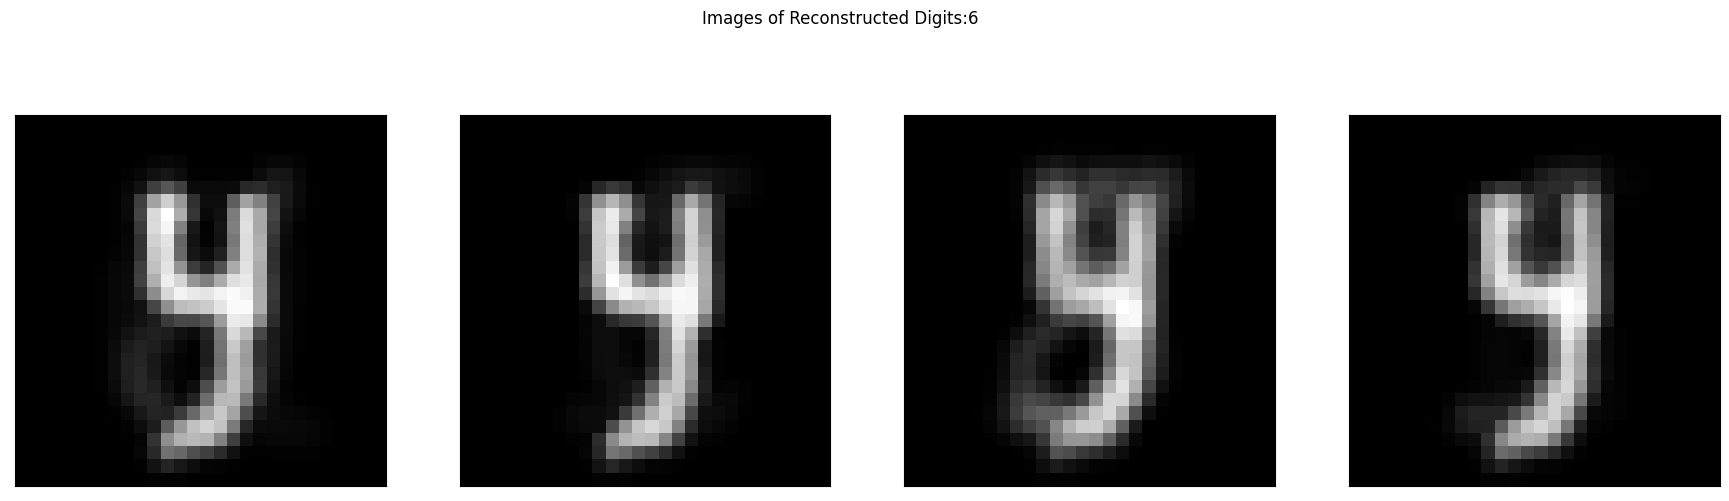

-------------------------------


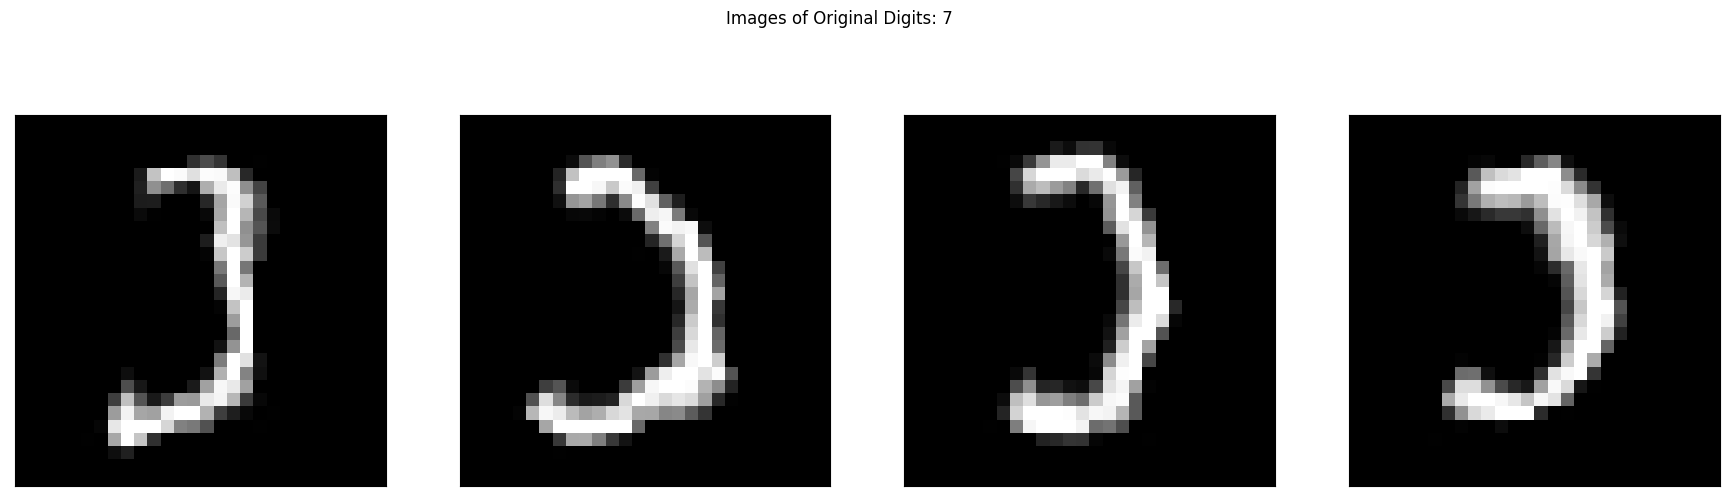

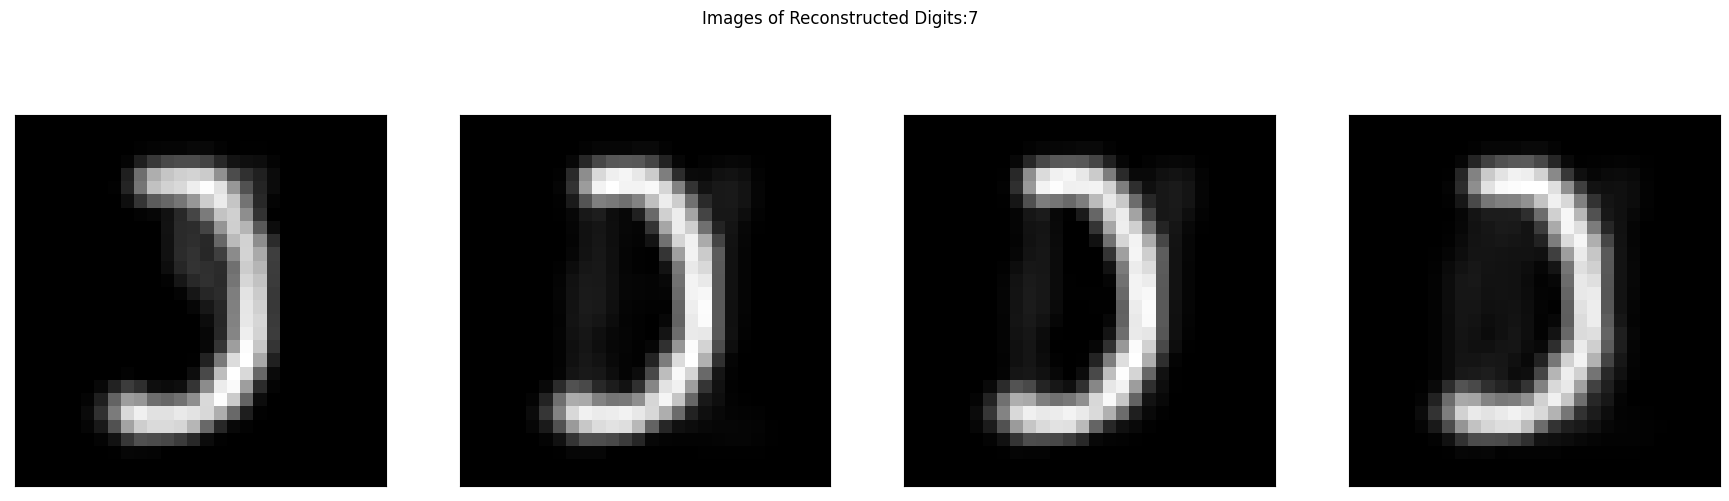

-------------------------------


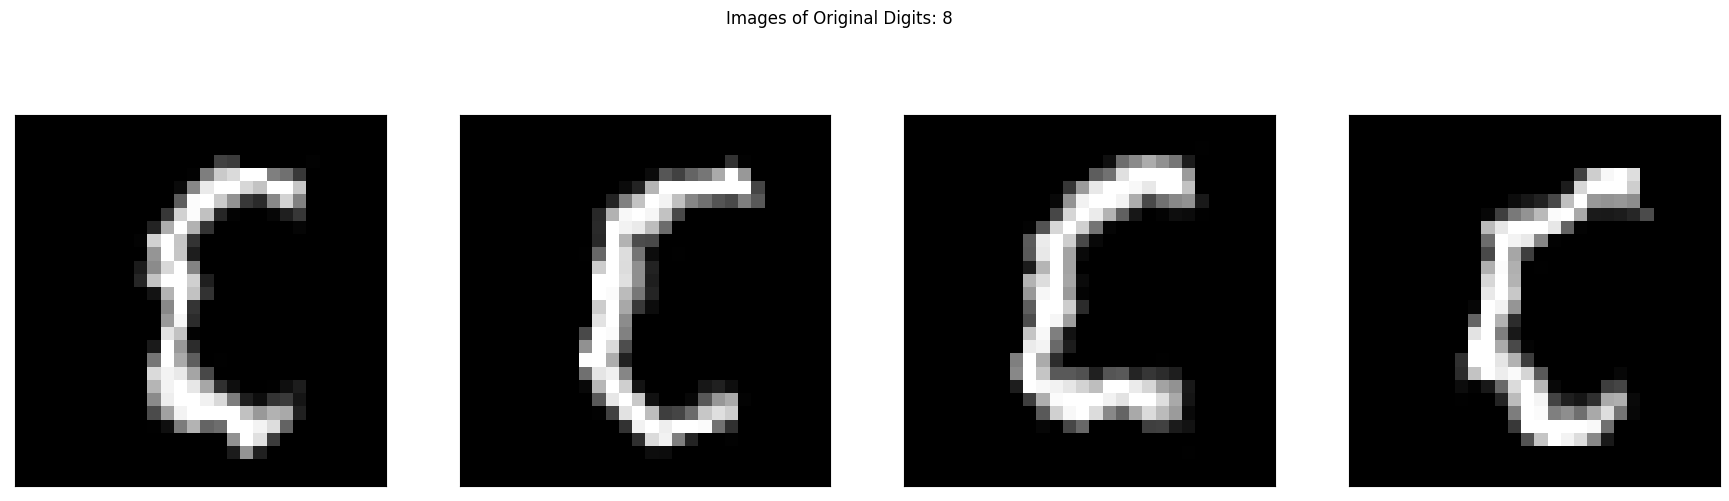

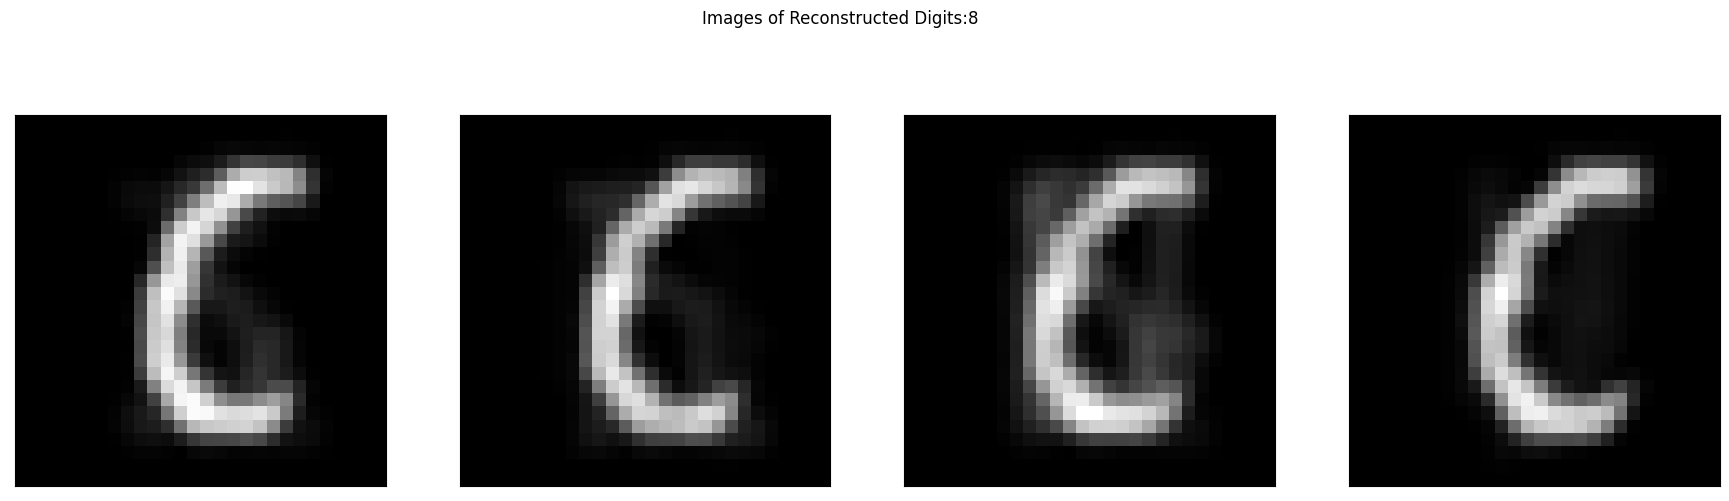

-------------------------------


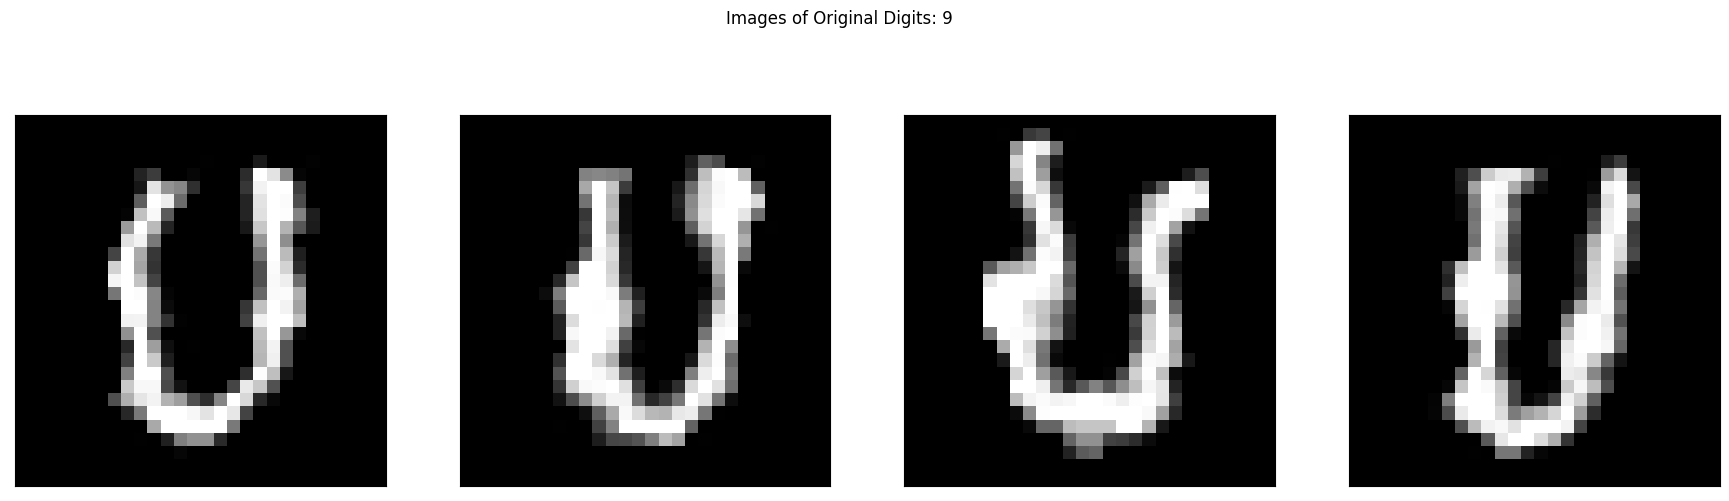

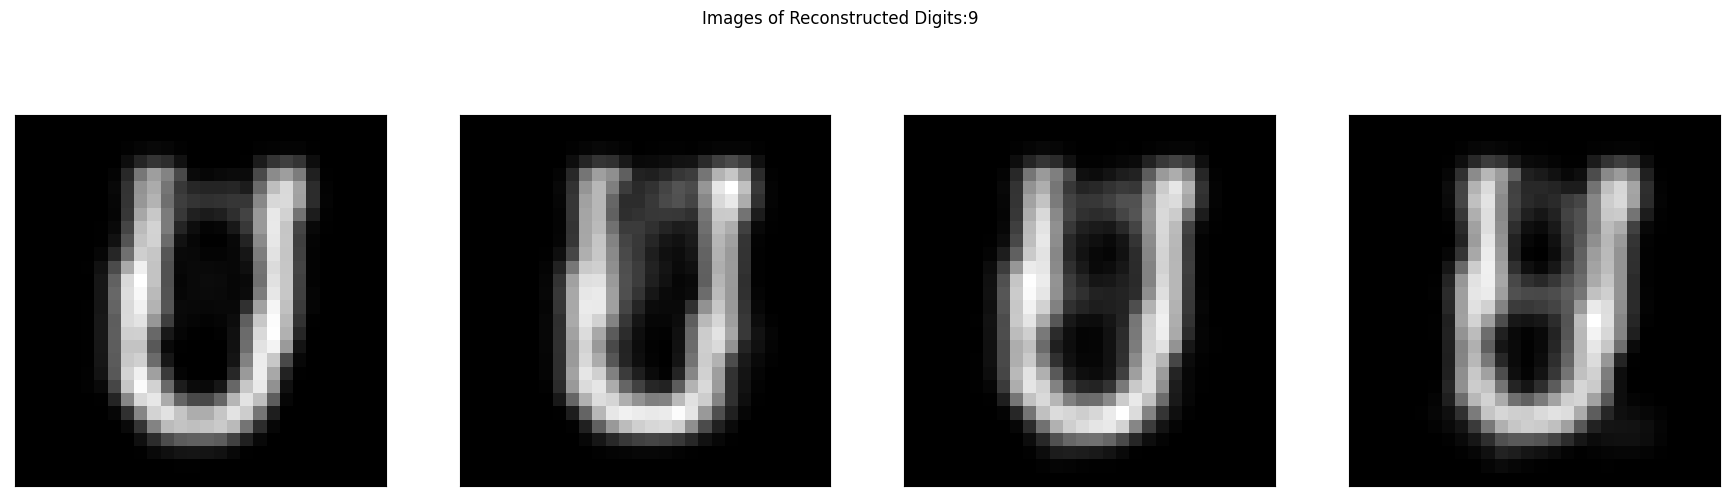

-------------------------------


In [44]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for digit in digits:

    #ORIGINAL IMAGES
    #Find just the rows in X that are an image of this particular digit
    df_digit_subset=df_numericals_nmf[df['digit']==digit]

    #Set up the plot
    fig, ax = plt.subplots(1, 4, figsize=(22, 6))
    plt.suptitle(f'Images of Original Digits: {digit}')

    #Visualize the first three images that are of this digit
    for i in range(0,4):
        #First, reshape the flattened 64 pixel array into an 28-by-28 numpy array and unscale the data (ie. multiply by 255)
        object_image = np.array(df_digit_subset.iloc[i]).reshape((28, 28))*255

        #Then show the image
        ax[i].imshow(object_image, cmap='gray')
        ax[i].grid(False)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()


    #RECONSTRUCTED IMAGES
    #Find just the rows in X that are an image of this particular digit
    df_digit_subset=df_Y[df['digit']==digit]

    #Set up the plot
    fig, ax = plt.subplots(1, 4, figsize=(22, 6))
    plt.suptitle(f'Images of Reconstructed Digits:{digit}')

    #Visualize the first four images that are of this digit
    for i in range(0,4):
        #First, reshape the flattened 64 pixel array into an 28-by-28 numpy array and unscale the data (ie. multiply by 255)
        object_image = np.array(df_digit_subset.iloc[i]).reshape((28, 28))*255

        #Then show the image
        ax[i].imshow(object_image, cmap='gray')
        ax[i].grid(False)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()
    print('-------------------------------')

In [45]:
nmf_components = nmf.components_
nmf_components.shape

(10, 784)

Average Silhouette Score (NMF): 0.2352444202881814


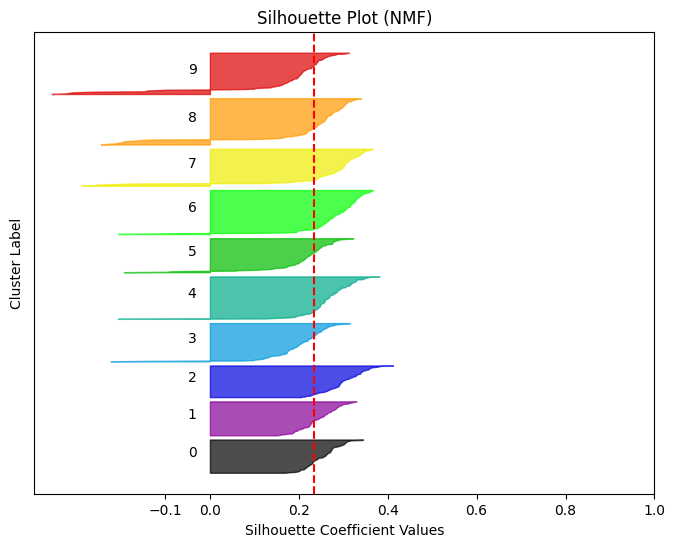

In [46]:
# Calculate Silhouette Scores for NMF
nmf_cluster_labels = np.argmax(W, axis=1)  # Assign each data point to the cluster with the highest membership score
silhouette_avg_nmf = silhouette_score(df_numericals_nmf, nmf_cluster_labels)
print(f"Average Silhouette Score (NMF): {silhouette_avg_nmf}")

sample_silhouette_values_nmf = silhouette_samples(df_numericals_nmf, nmf_cluster_labels)

# Plotting Silhouette Bar Plot for NMF
y_lower_nmf = 10

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values_nmf[nmf_cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower_nmf + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 10)
    ax.fill_betweenx(
        np.arange(y_lower_nmf, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax.text(-0.05, y_lower_nmf + 0.5 * size_cluster_i, str(i))
    y_lower_nmf = y_upper + 10

ax.set_title("Silhouette Plot (NMF)")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg_nmf, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

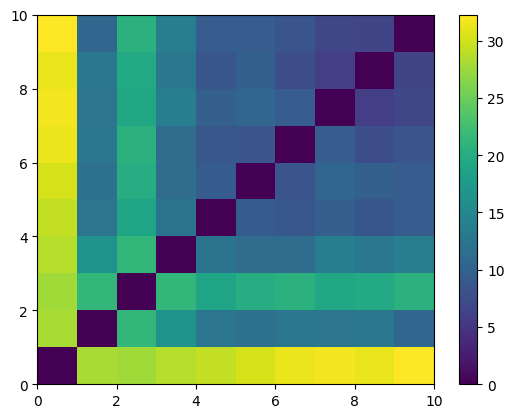

In [47]:
from scipy.spatial.distance import pdist, squareform

dist_mat = squareform(pdist(H_df))

plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(H_df)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [48]:
cluster_assignments = []
for i in range(len(df_cm_scores_W)):
  row = df_cm_scores_W.iloc[i]
  cluster_assignments.append(row.idxmax())

assignments = df_cm_scores_W.copy()
assignments["Cluster"] = cluster_assignments

preassigned_label = df_combo['digit']
predicted_label = assignments['Cluster']

rand_index = rand_score(preassigned_label, predicted_label)
print(f"Rand Index: {rand_index}")

adjusted_rand_index = adjusted_rand_score(preassigned_label, predicted_label)
print(f"Adjusted Rand Index: {adjusted_rand_index}")

Rand Index: 0.9831711711711711
Adjusted Rand Index: 0.9067670125403361


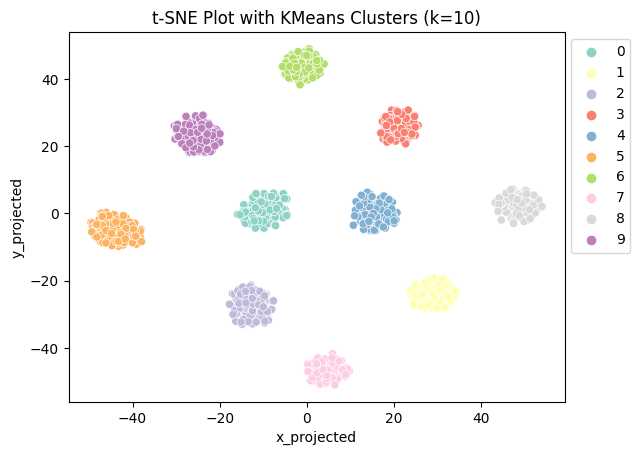

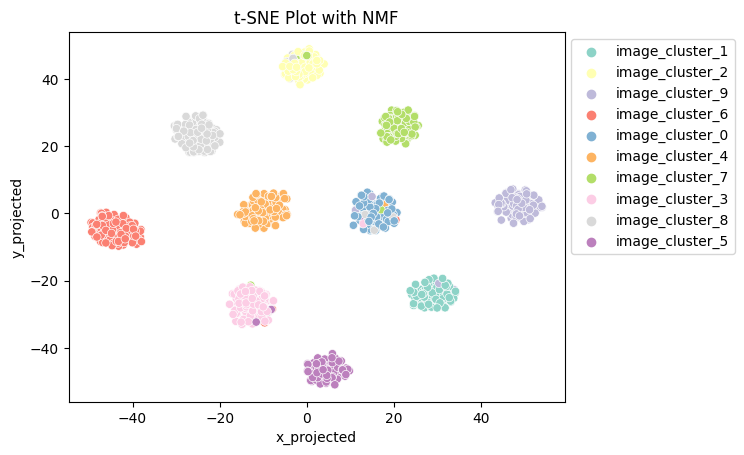

In [49]:
sns.scatterplot(x='x_projected', y='y_projected', hue='kmeans_cluster', palette=sns.color_palette("Set3", 10), data=df_combo)
plt.title('t-SNE Plot with KMeans Clusters (k=10)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

sns.scatterplot(x='x_projected', y='y_projected', hue=assignments['Cluster'], palette=sns.color_palette("Set3", 10), data=df_combo)
plt.title('t-SNE Plot with NMF')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()